In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")

In [80]:
# Lets read Application data
inp0= pd.read_csv('/content/drive/Othercomputers/My Laptop/UPGRAD/Credit EDA assignment/application_data.csv')
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [81]:
# Application data
inp1=  pd.read_csv('/content/drive/Othercomputers/My Laptop/UPGRAD/Credit EDA assignment/application_data.csv')

In [82]:
inp1.shape

(307511, 122)

In [83]:
#Removing columns with more than 10% missing data

In [84]:
# cleaning the missing data
# check the columns with more than 10% missing data 
empty=inp0.isnull().sum()
empty=empty[empty.values>(0.1*len(empty))] 
empty

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [85]:
# lets remove these empty columns
inp1.drop(labels=list(empty.index),axis=1,inplace=True)
inp1.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6'

In [86]:
# lets drop the unwanted columns which are not needed for analysis as these are not significant while analysing loan default pattern
unwanted=['DAYS_ID_PUBLISH','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'NAME_CONTRACT_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_2','DAYS_REGISTRATION',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']

inp1.drop(labels=unwanted,axis=1,inplace=True)

In [87]:
# two important columns OCCUPATION_TYPE & AMT_GOODS have lost due to initial drop code lets reinstate them again by listing important columns
inp1 = inp1.join(inp0[['OCCUPATION_TYPE','AMT_GOODS_PRICE']])
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [88]:
# Lets check null rows
inp1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                  0
DAYS_LAST_PHONE_CHANGE             1
OCCUPATION_TYPE                96391
AMT_GOODS_PRICE                  278
dtype: int64

In [89]:
#Lets remove null rows
inp1=inp1.dropna()

In [90]:
inp1.shape

(210887, 23)

In [91]:
# Lets check data imbalance for target variable 
inp1.TARGET.value_counts(normalize=True)*100 

0    91.213304
1     8.786696
Name: TARGET, dtype: float64

In [92]:
# Defaulters are 8% while non defaulters are 92%

In [93]:
# Lets categorize numerical(continuous) and categorical variables
ID= ['SK_ID_CURR']
NUM= ['TARGET', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
      'DAYS_LAST_PHONE_CHANGE']

CAT= ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
      'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_RATING_CLIENT_W_CITY',  'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
      'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

len(ID)+len(NUM)+len(CAT)

23

#### Univariate Analysis

Boxplot of TARGET


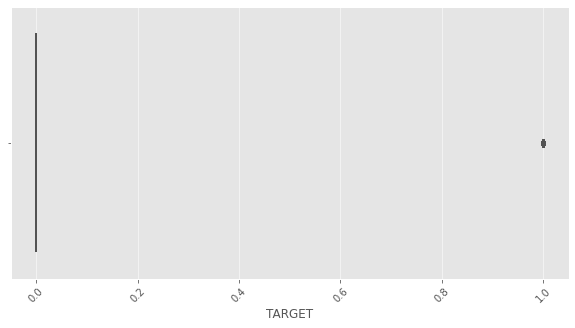

Boxplot of AMT_CREDIT


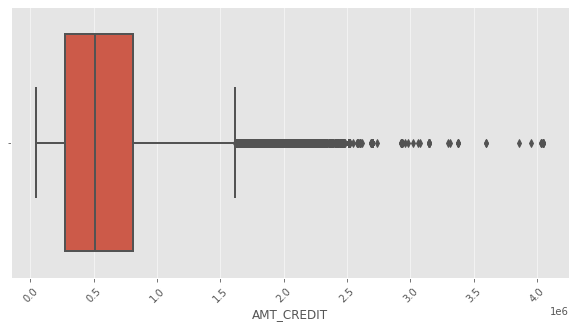

Boxplot of AMT_ANNUITY


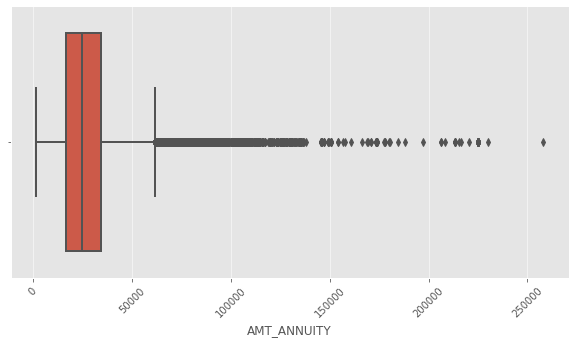

Boxplot of AMT_INCOME_TOTAL


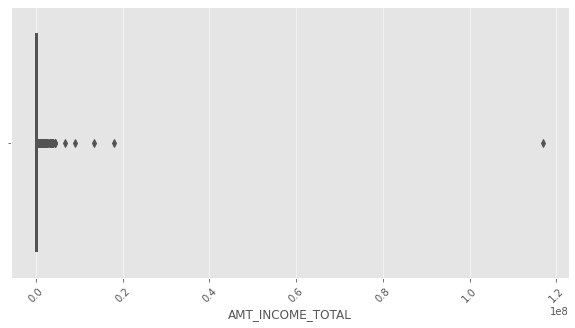

Boxplot of AMT_GOODS_PRICE


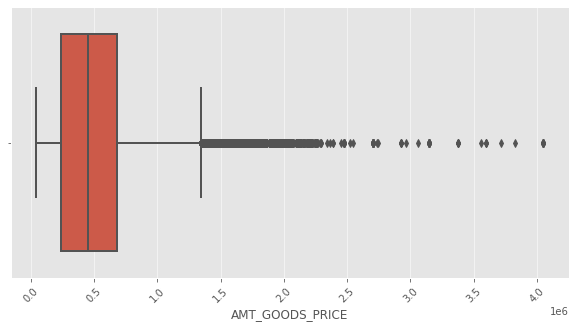

Boxplot of DAYS_BIRTH


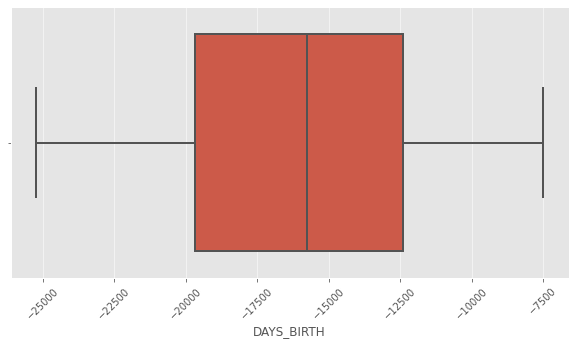

Boxplot of DAYS_EMPLOYED


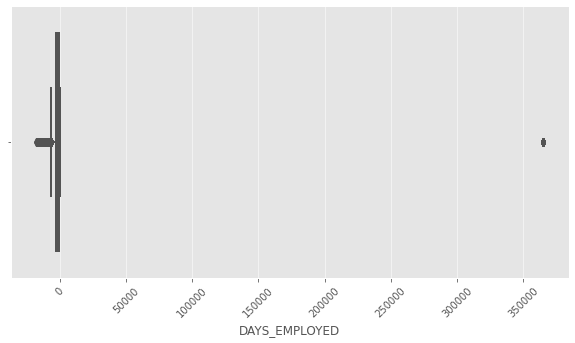

Boxplot of DAYS_LAST_PHONE_CHANGE


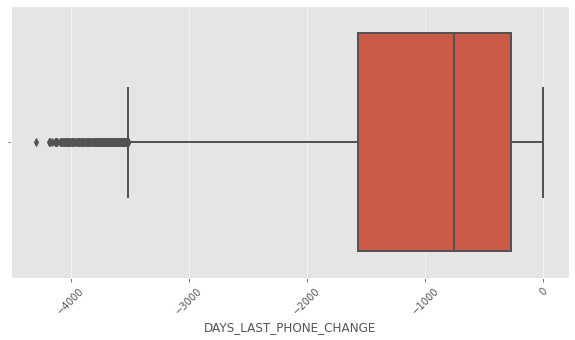

In [94]:
# lets check the spread of numeric columns
plt.style.use('ggplot')
for i in NUM:
    plt.figure(figsize= [10,5]) 
    print("Boxplot of",i)
    sns.boxplot(inp0[i])
    plt.xticks(rotation=45)
    plt.show() 

In [95]:
# we cant see spread of AMT_INCOME_TOTAL properly
inp1.AMT_INCOME_TOTAL.describe()

count    2.108870e+05
mean     1.758169e+05
std      2.752764e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [96]:
# lets convert AMT_INCOME_TOTAL into a category column
inp1.AMT_INCOME_TOTAL = pd.cut(inp0.AMT_INCOME_TOTAL, [20000,100000,150000,200000,1000000000], labels=['<1L','1L-1.5L','1.5L-2L','2L+'])

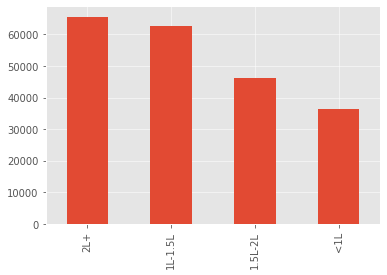

In [97]:
inp1.AMT_INCOME_TOTAL.value_counts().plot.bar()
plt.show()

In [98]:
# lets update groups
NUM= ['TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
      'DAYS_LAST_PHONE_CHANGE']

CAT= ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL',
      'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_RATING_CLIENT_W_CITY',  'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
      'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [99]:
# DAYS_EMPLOYED has a positive value which it shouldnt have as days employed is in negative days for which applicant is employed
# so these values are outlier lets remove it 
inp1= inp1[~(inp1.DAYS_EMPLOYED > 0)]

boxplot of DAYS_EMPLOYED 


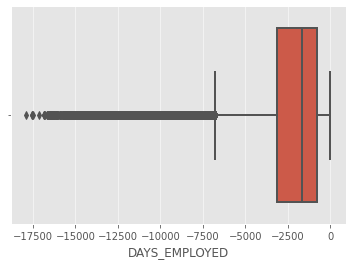

In [100]:
print('boxplot of DAYS_EMPLOYED ')
sns.boxplot(inp1.DAYS_EMPLOYED)
plt.show()

Histogram of TARGET


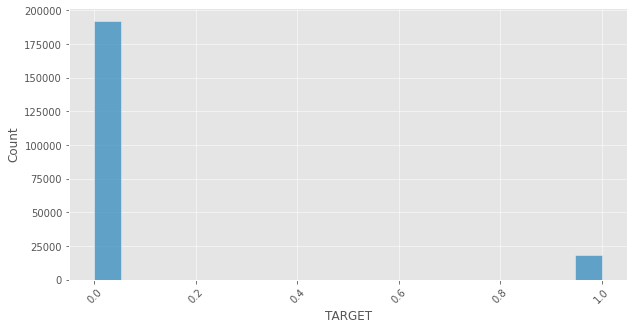

Histogram of AMT_CREDIT


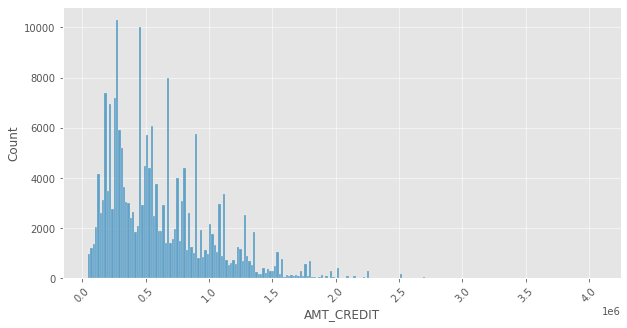

Histogram of AMT_ANNUITY


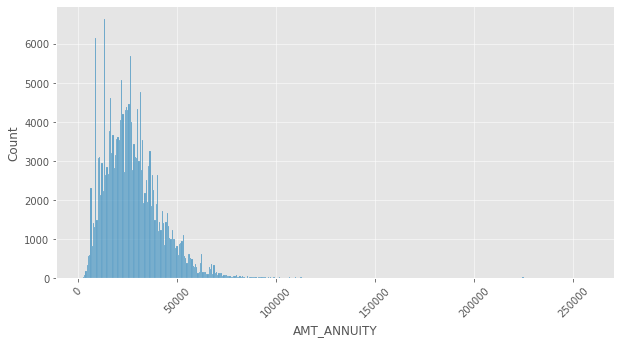

Histogram of DAYS_BIRTH


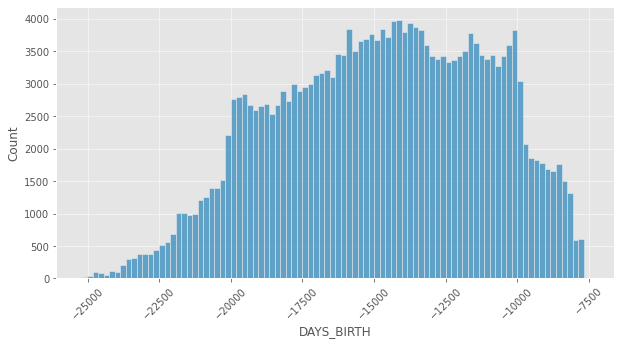

Histogram of DAYS_EMPLOYED


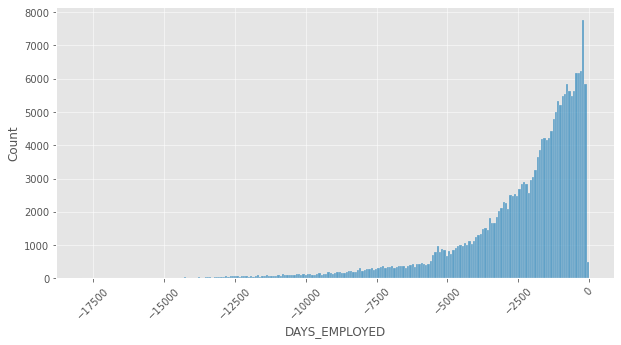

Histogram of DAYS_LAST_PHONE_CHANGE


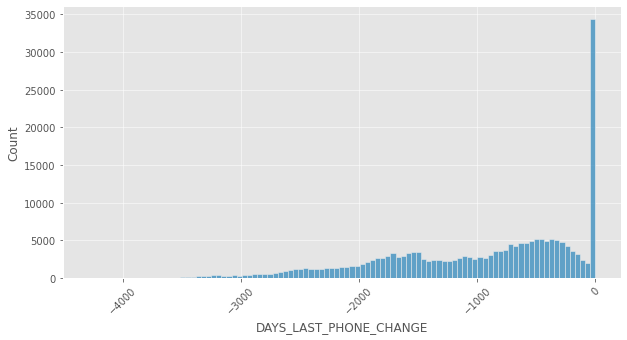

In [101]:
# lets check the spread of Continuous variables in NUM with histogram now
for i in NUM:
    plt.figure(figsize= [10,5]) 
    print("Histogram of",i)
    sns.histplot(inp1[i])
    plt.xticks(rotation=45)
    plt.show() 

countplot of CODE_GENDER


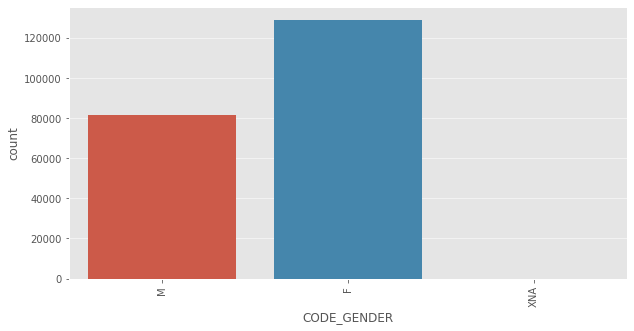

countplot of FLAG_OWN_CAR


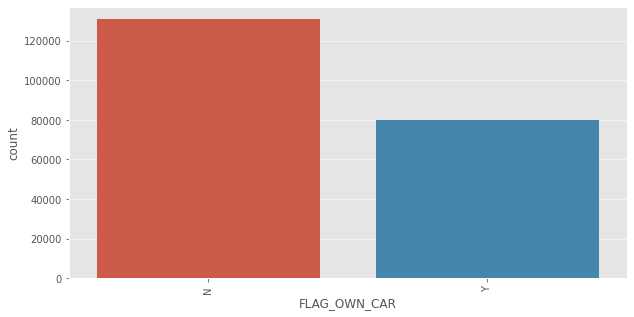

countplot of FLAG_OWN_REALTY


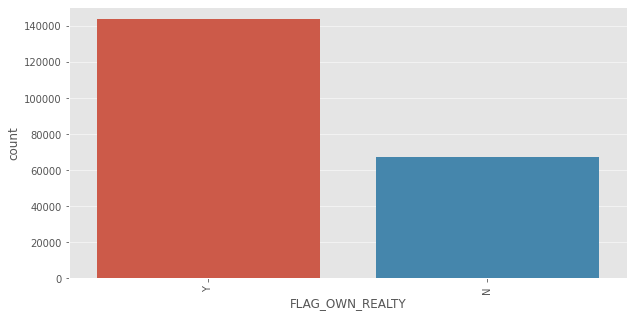

countplot of NAME_INCOME_TYPE


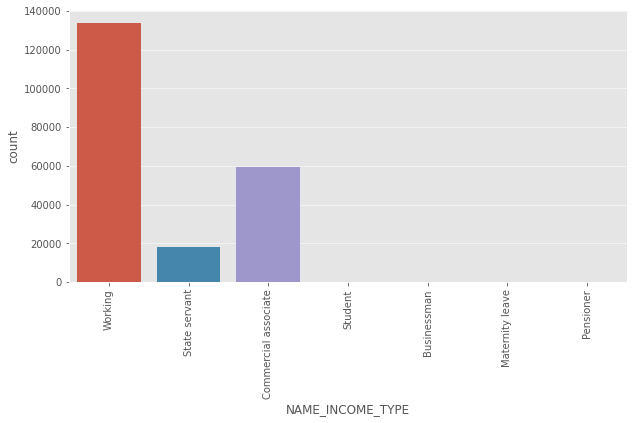

countplot of CNT_CHILDREN


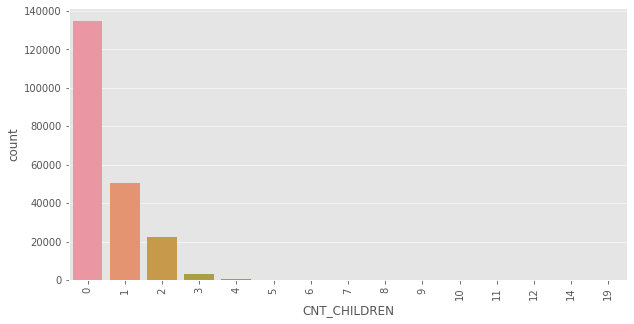

countplot of CNT_FAM_MEMBERS


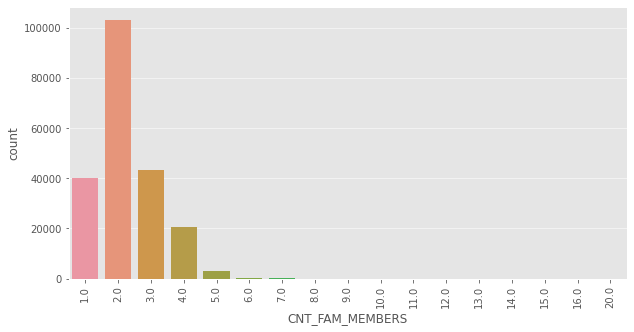

countplot of AMT_INCOME_TOTAL


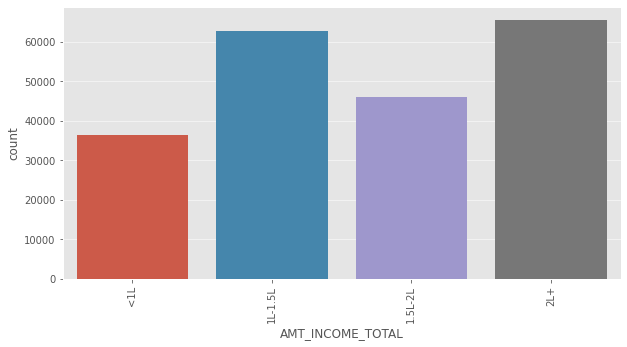

countplot of NAME_EDUCATION_TYPE


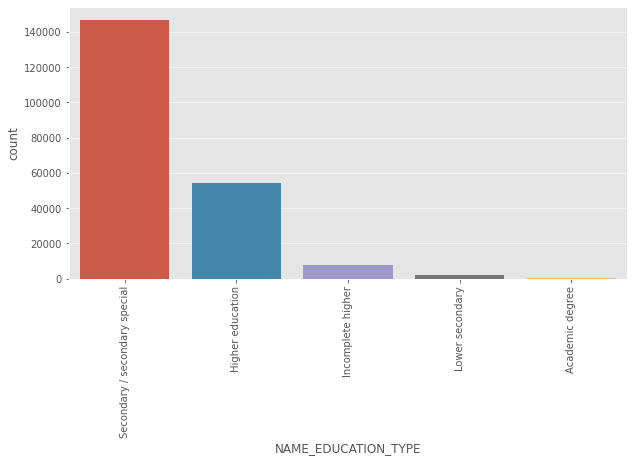

countplot of NAME_FAMILY_STATUS


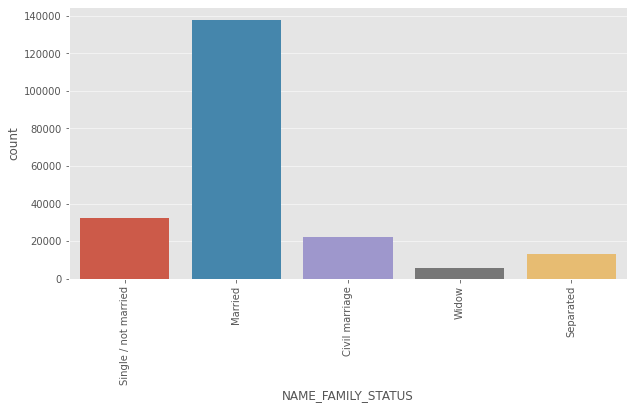

countplot of REGION_RATING_CLIENT_W_CITY


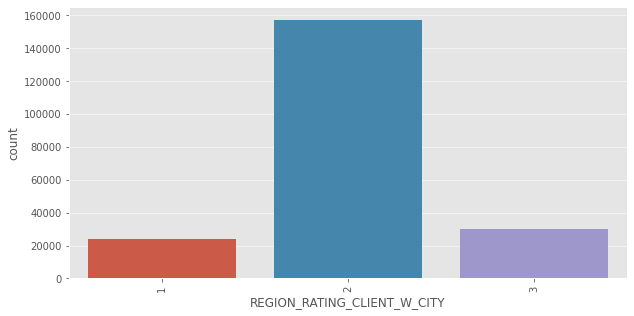

countplot of REG_REGION_NOT_WORK_REGION


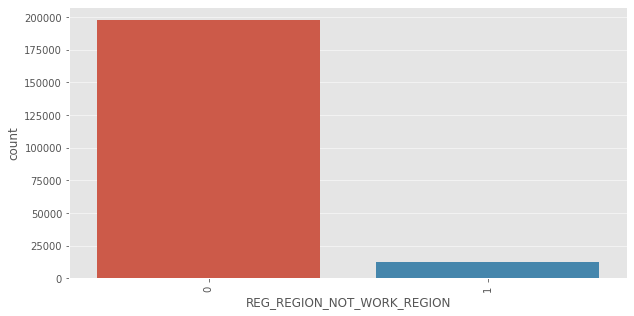

countplot of LIVE_REGION_NOT_WORK_REGION


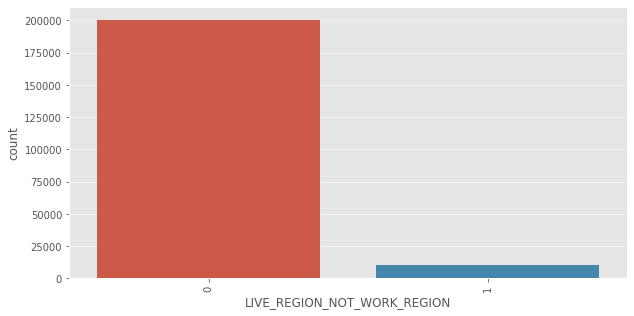

countplot of NAME_HOUSING_TYPE


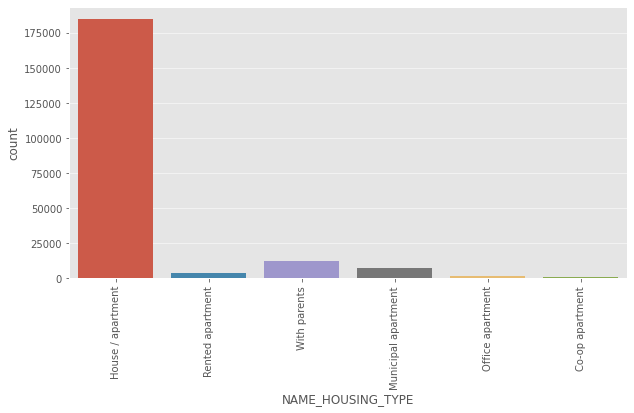

countplot of OCCUPATION_TYPE


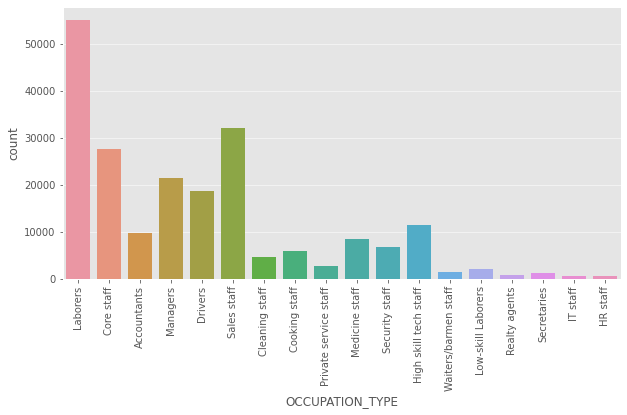

countplot of ORGANIZATION_TYPE


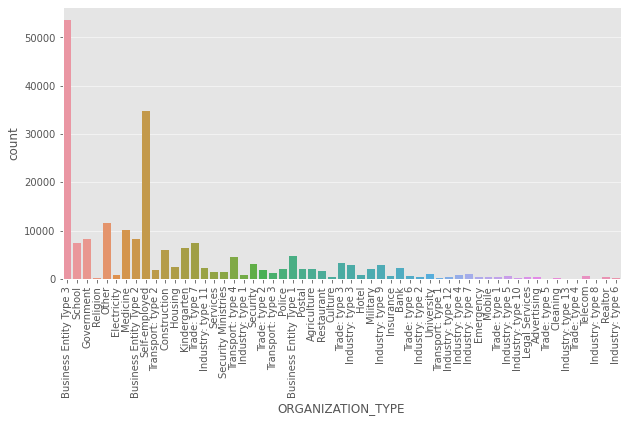

In [102]:
# Now lets do univariate analysis of category columns
for i in CAT:
    print("countplot of",i)
    plt.figure(figsize=[10,5])
    sns.countplot(inp1[i])
    plt.xticks(rotation=90)
    plt.show() 

In [103]:
# Lets remove XNA from CODE_GENDER
inp1= inp1[~(inp1.CODE_GENDER=='XNA')]

In [104]:
inp1.CODE_GENDER.value_counts()

F    129130
M     81755
Name: CODE_GENDER, dtype: int64

#### Bivariate Analysis

In [105]:
# Now lets figure out what kind of applicants have more difficulties in payment
# with help of bivariate analysis wrt Target variable

Default Percent with respect to  CODE_GENDER


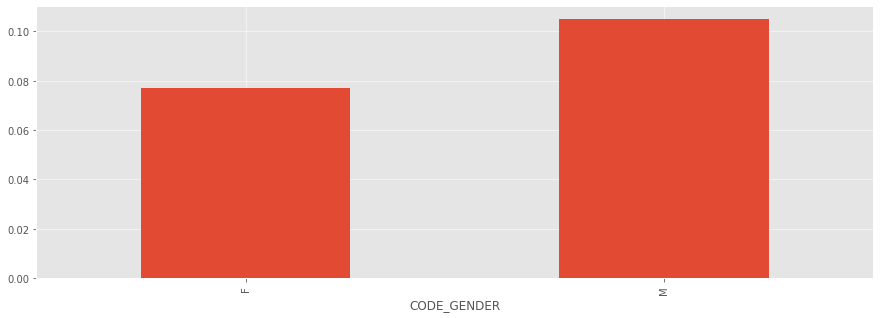

Default Percent with respect to  FLAG_OWN_CAR


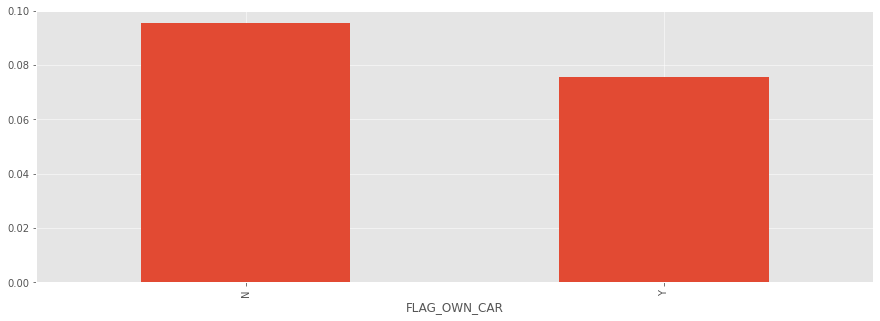

Default Percent with respect to  FLAG_OWN_REALTY


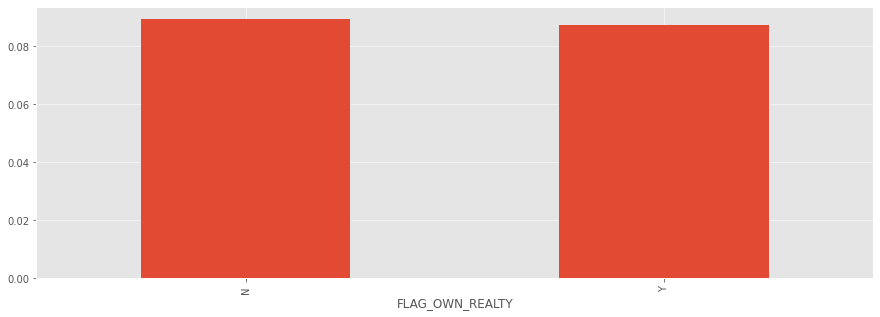

Default Percent with respect to  NAME_INCOME_TYPE


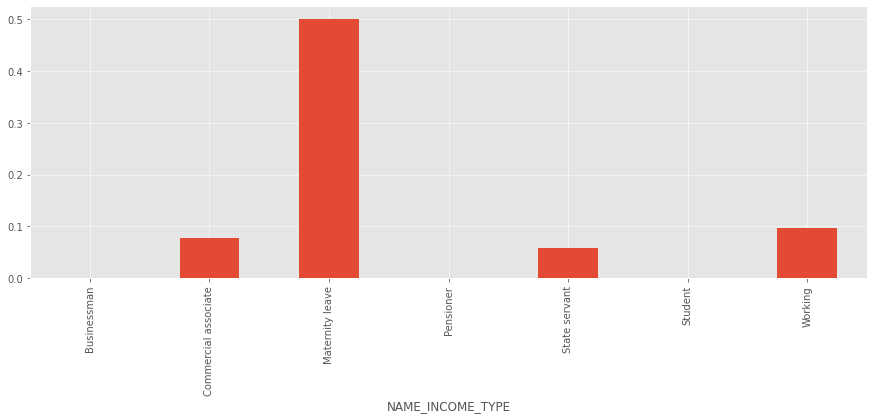

Default Percent with respect to  CNT_CHILDREN


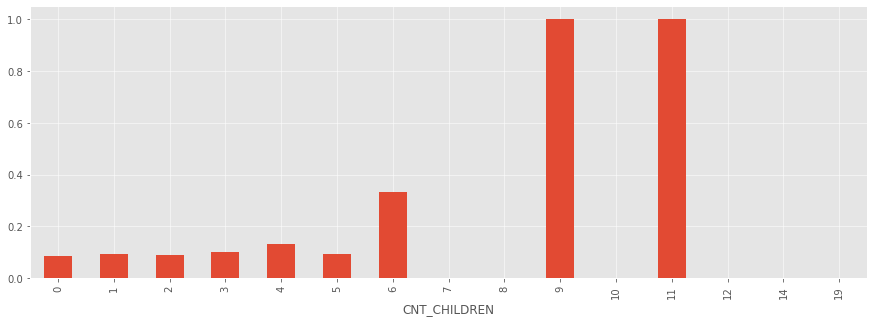

Default Percent with respect to  CNT_FAM_MEMBERS


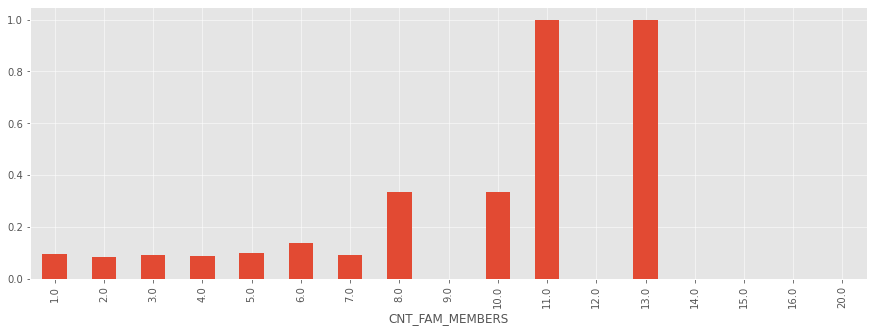

Default Percent with respect to  AMT_INCOME_TOTAL


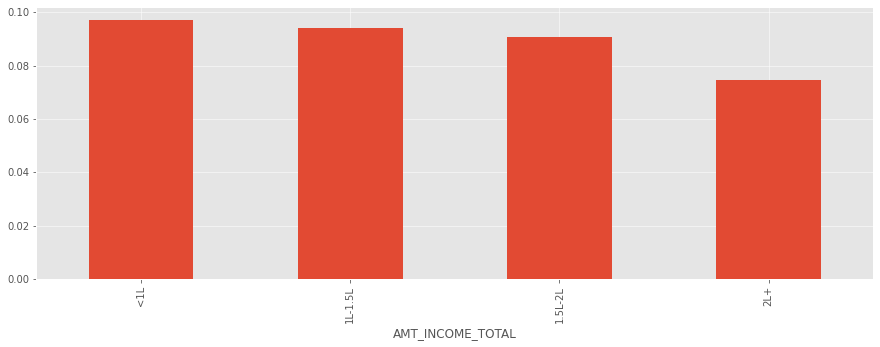

Default Percent with respect to  NAME_EDUCATION_TYPE


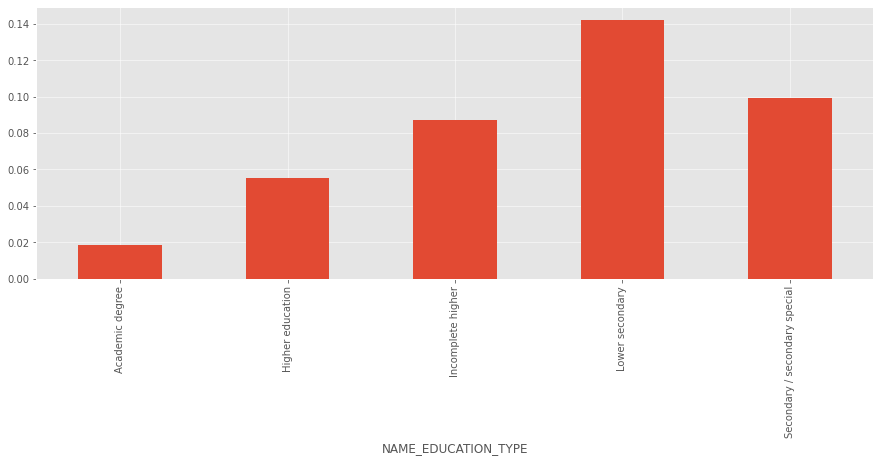

Default Percent with respect to  NAME_FAMILY_STATUS


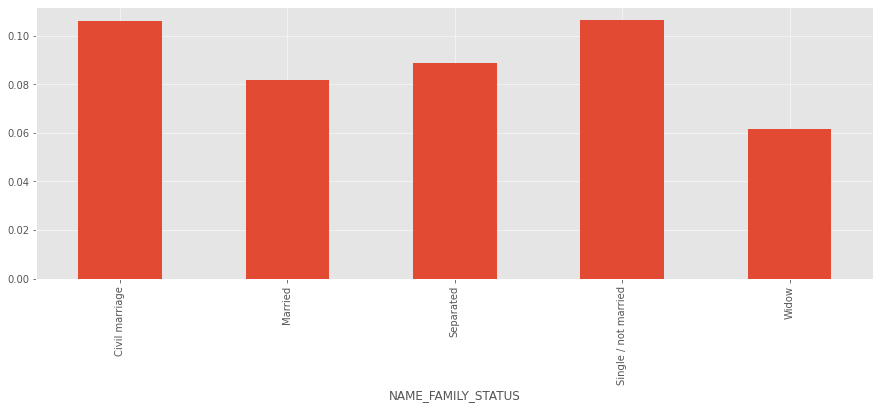

Default Percent with respect to  REGION_RATING_CLIENT_W_CITY


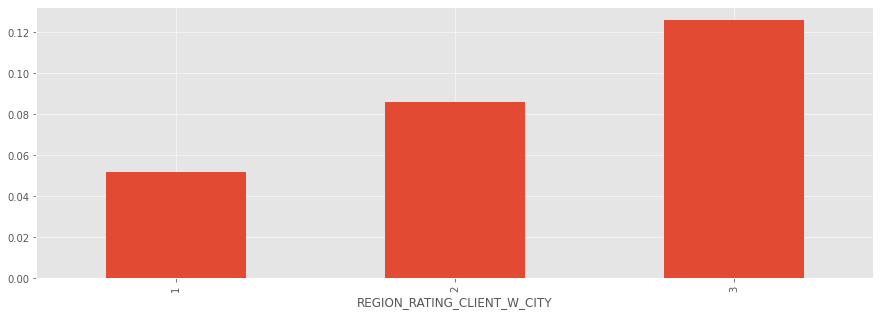

Default Percent with respect to  REG_REGION_NOT_WORK_REGION


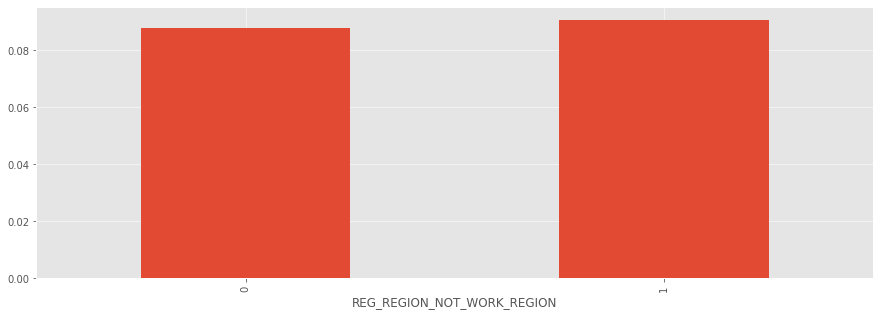

Default Percent with respect to  LIVE_REGION_NOT_WORK_REGION


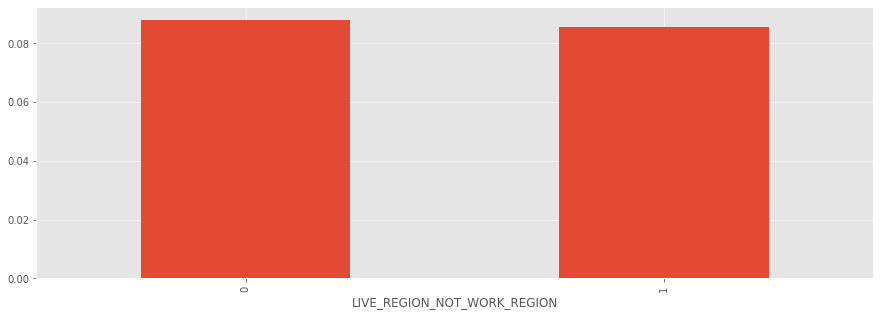

Default Percent with respect to  NAME_HOUSING_TYPE


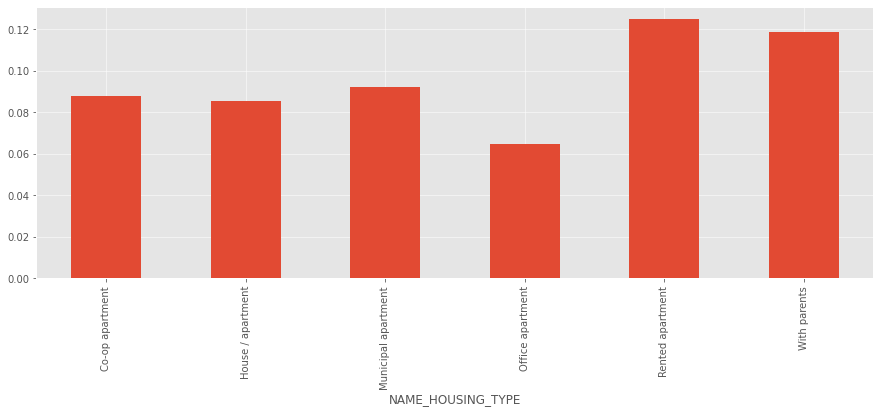

Default Percent with respect to  OCCUPATION_TYPE


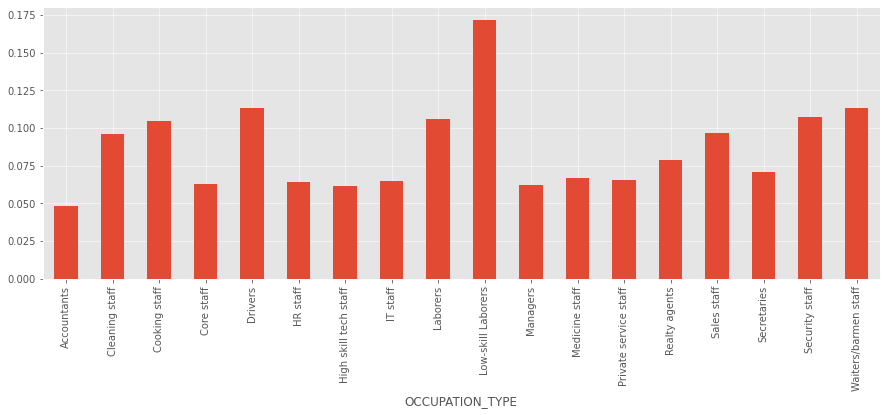

Default Percent with respect to  ORGANIZATION_TYPE


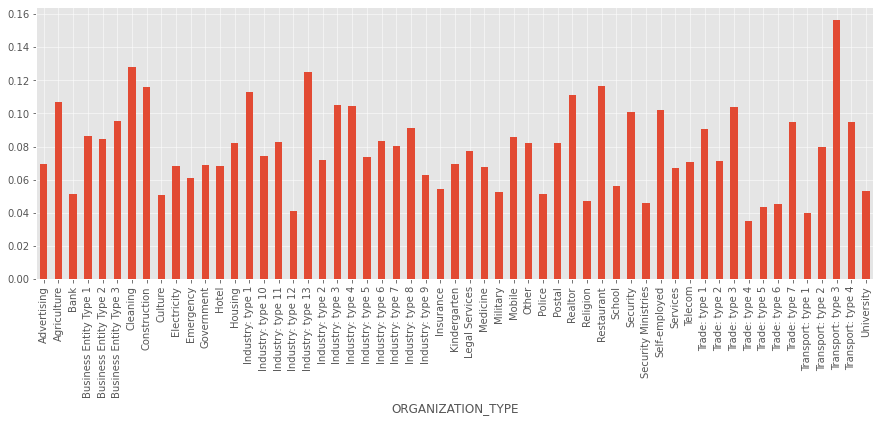

In [106]:
# Bivariate analysis of Categorical variables wrt Target veriables
plt.style.use('fast')
for i in CAT:
  print('Default Percent with respect to ',i)
  plt.figure(figsize= [15,5])
  inp1.groupby(i)['TARGET'].mean().plot.bar()
  plt.show()

In [107]:
# Lets check which categories have more than 0.1(10%) in defaults
#1. Men are more likely to default than females
#2. People Owning car or realty has default rate between 6-8%
#3. People with 'Maternity leave' income type do upto 50% defaults
#4. People with more than 5 children are more likely to default with 30% to 100% rate
#5. people with more than 7 family members are more likely to default with 30% to 100% reinstate
#6. people with lower secondary education more likely to default with rate 14%
#7. people living in tier 3 city more likely to default at rate 14%
#8. people who lives in apartment or with the their parents are more likely to default at 12+%
#9. low skill labourors more likely to default at 17%


Default percentage with respect to  TARGET


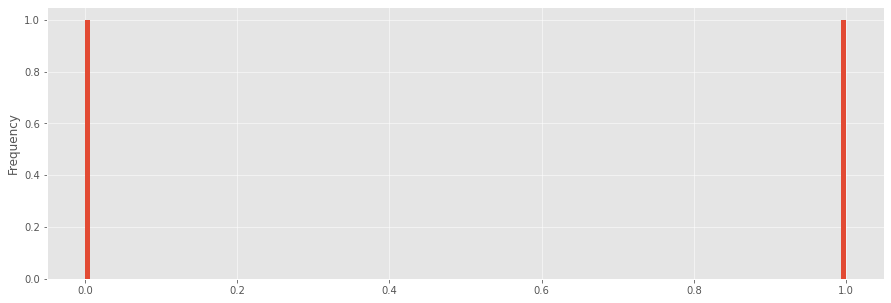

Default percentage with respect to  AMT_CREDIT


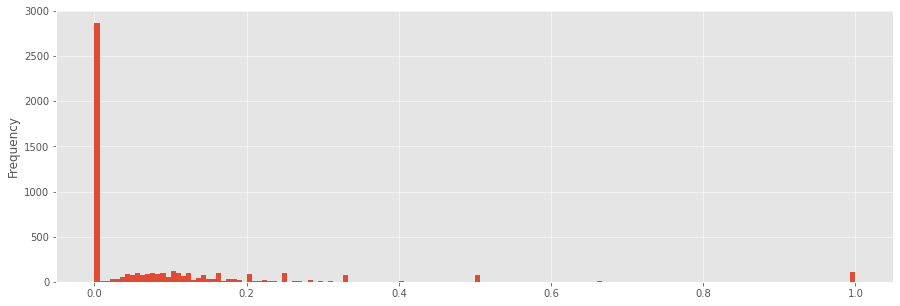

Default percentage with respect to  AMT_ANNUITY


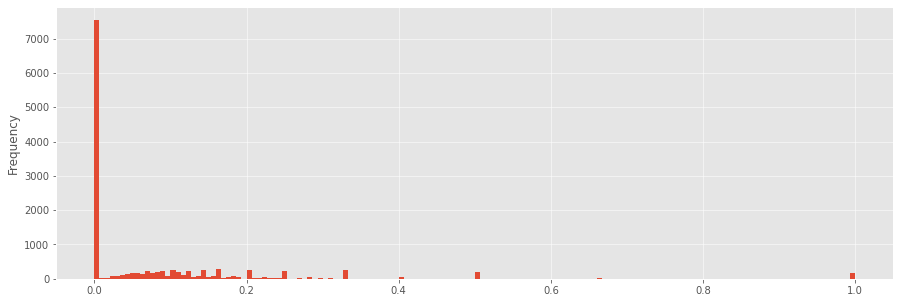

Default percentage with respect to  DAYS_BIRTH


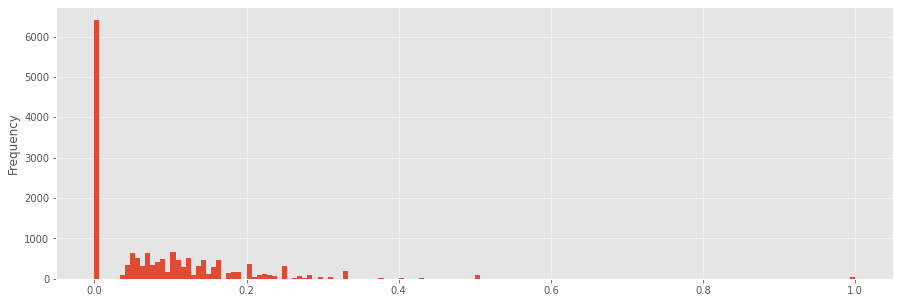

Default percentage with respect to  DAYS_EMPLOYED


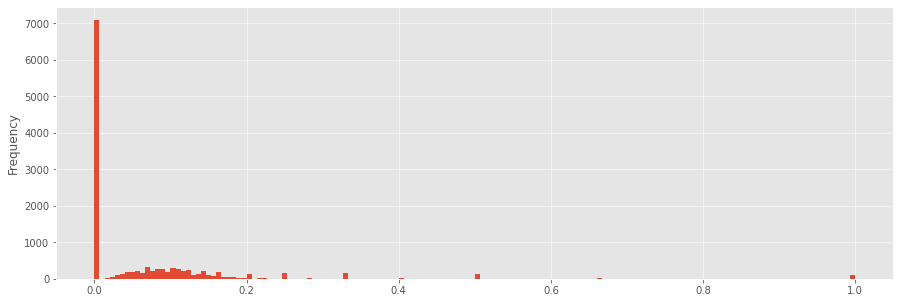

Default percentage with respect to  DAYS_LAST_PHONE_CHANGE


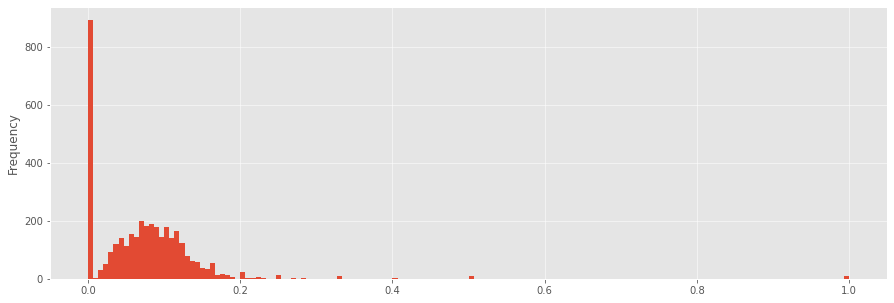

In [108]:
# Bivariate analysis of Continuous data(NUM) wrt Target Variable
for i in NUM:
  print('Default percentage with respect to ',i)
  plt.figure(figsize= [15,5])
  inp1.groupby(i)['TARGET'].mean().plot.hist(bins=150)
  plt.show()

#### Multivariate Analysis

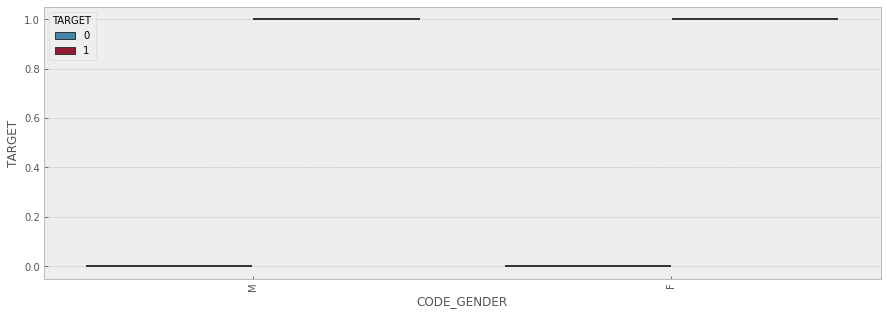

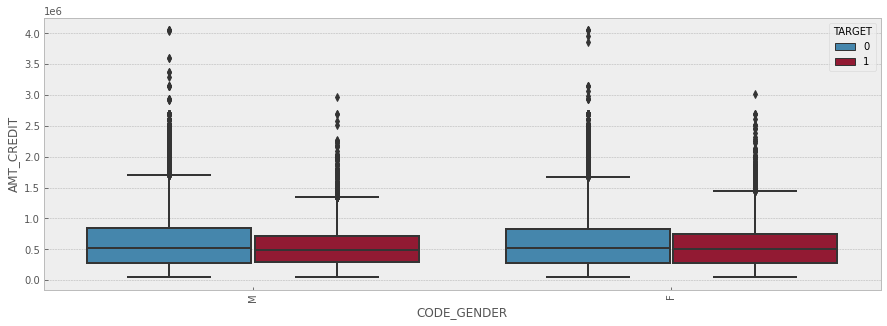

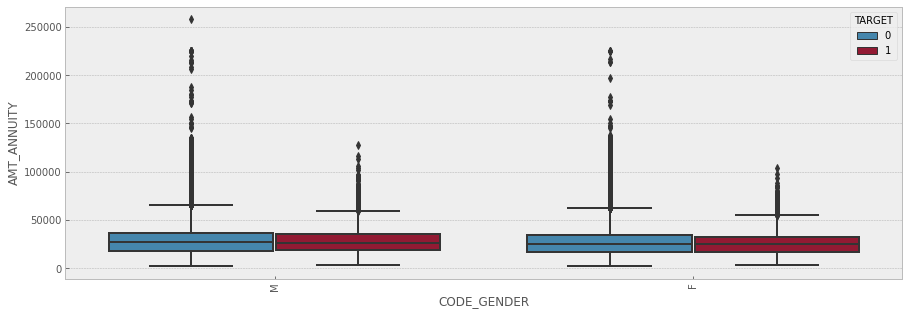

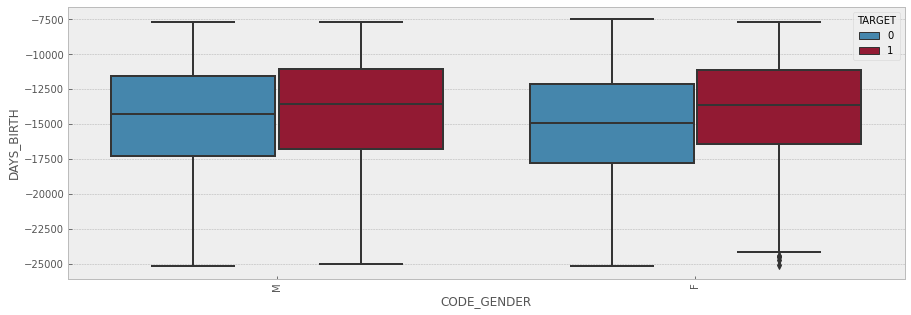

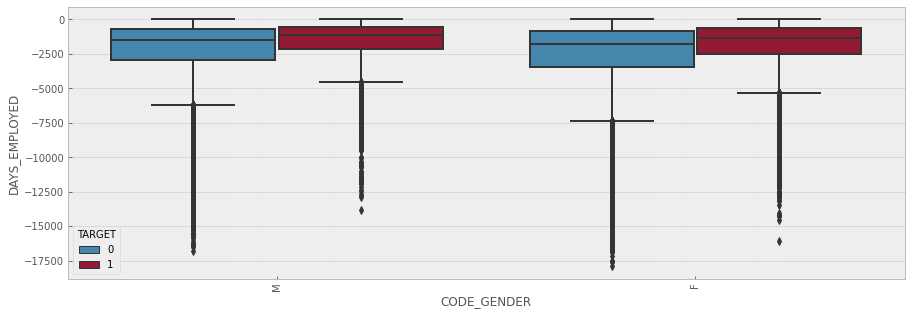

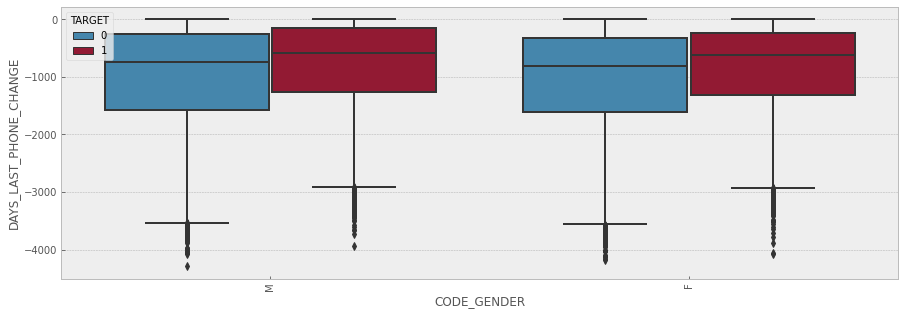

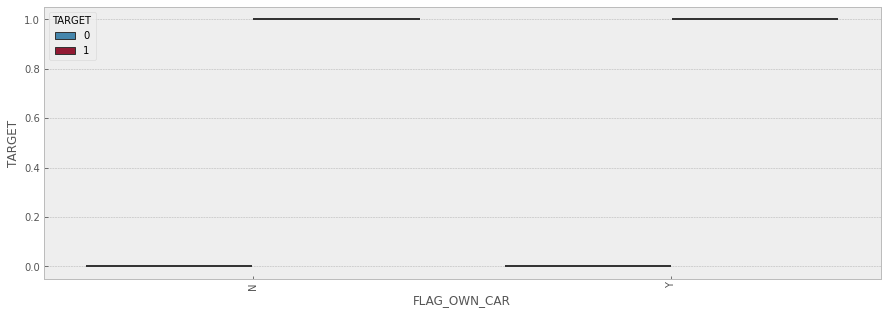

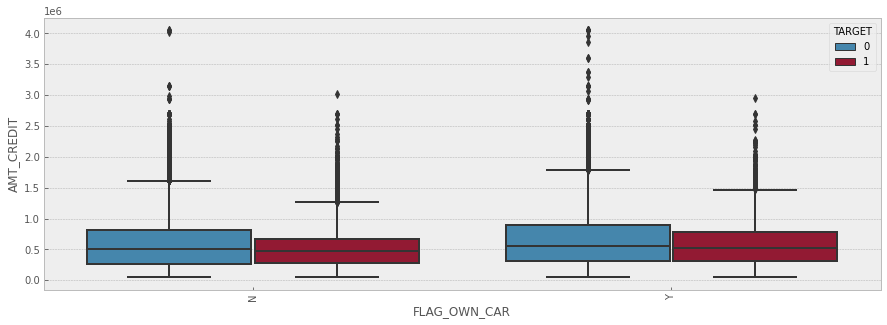

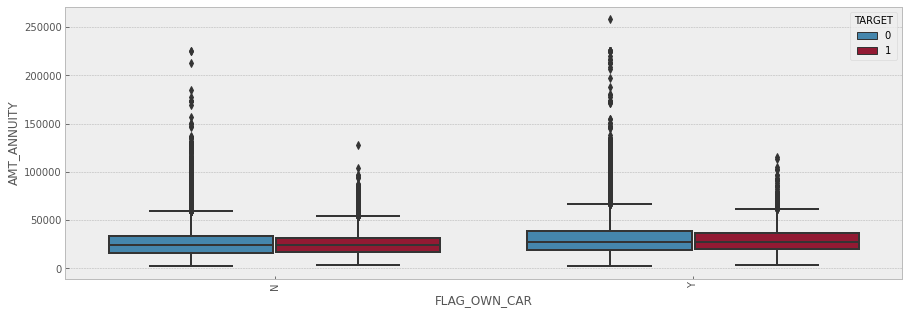

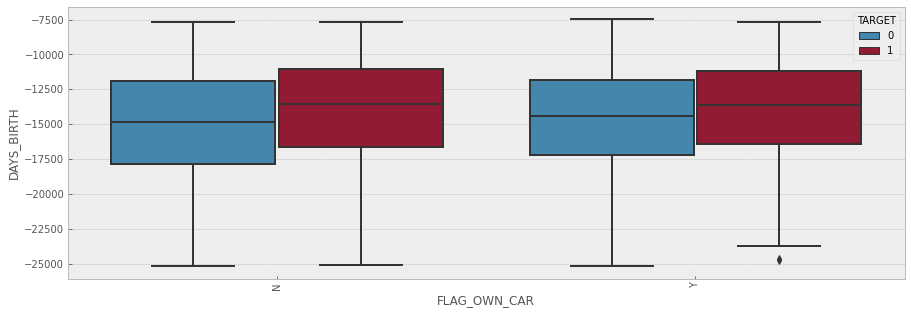

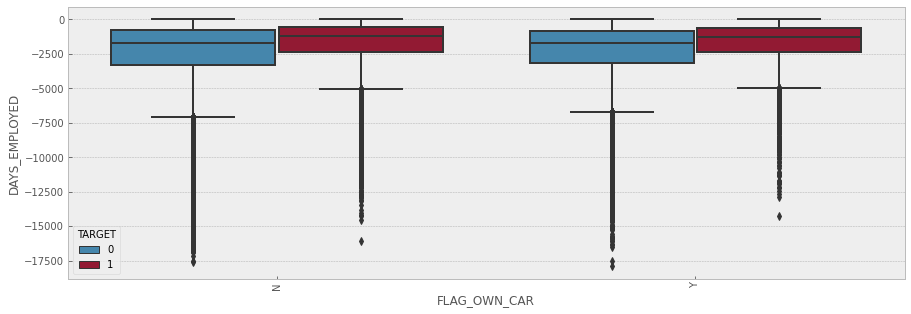

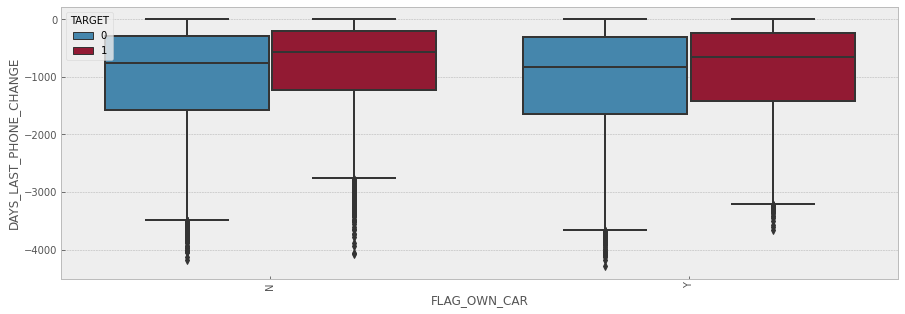

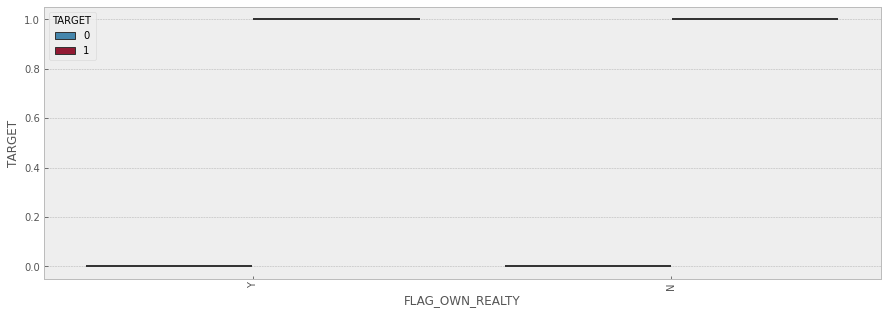

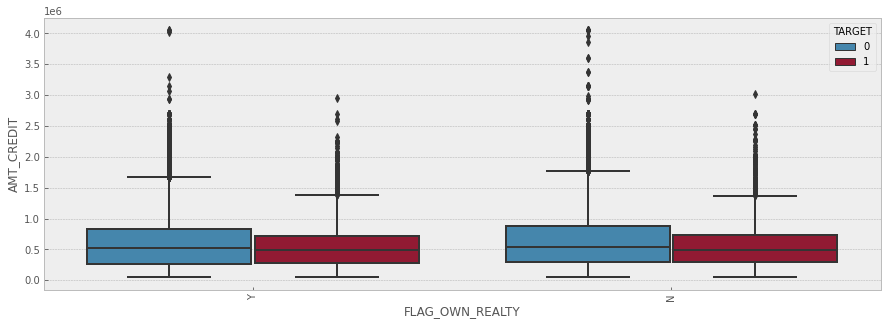

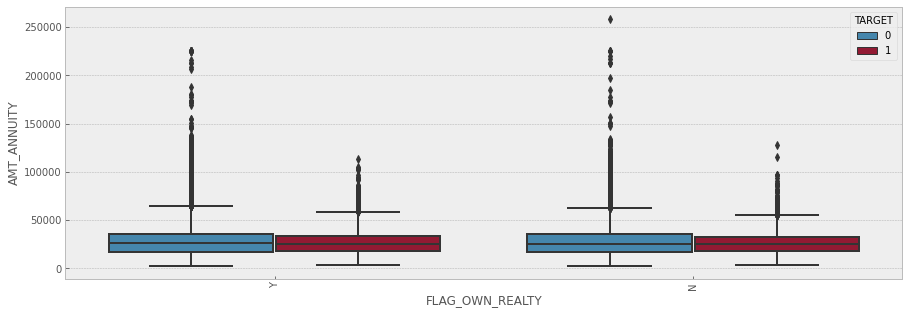

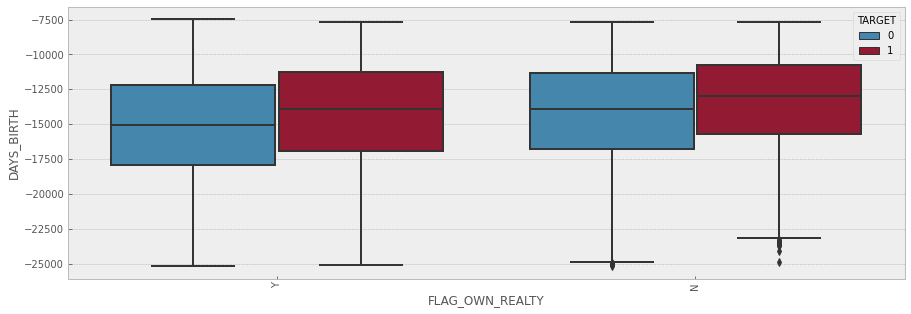

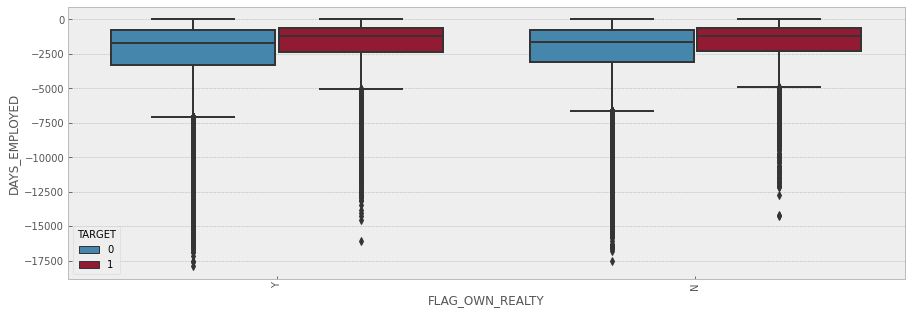

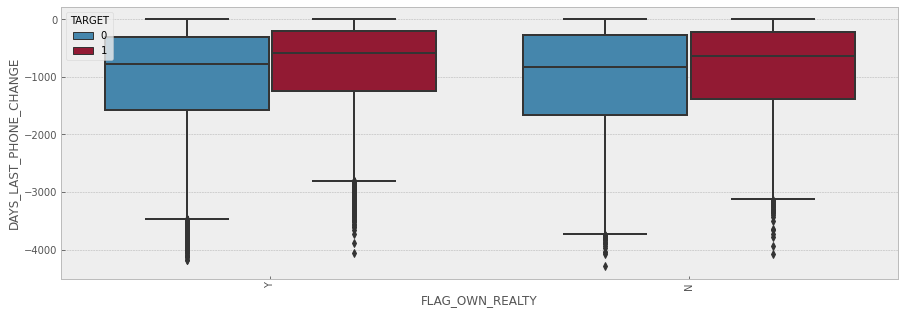

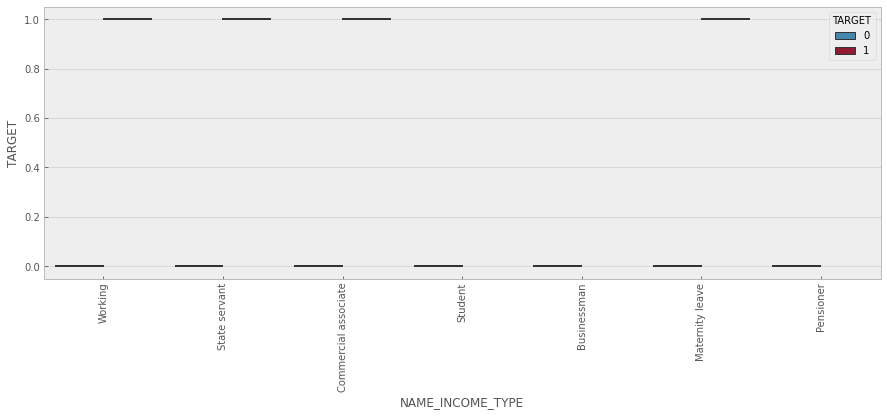

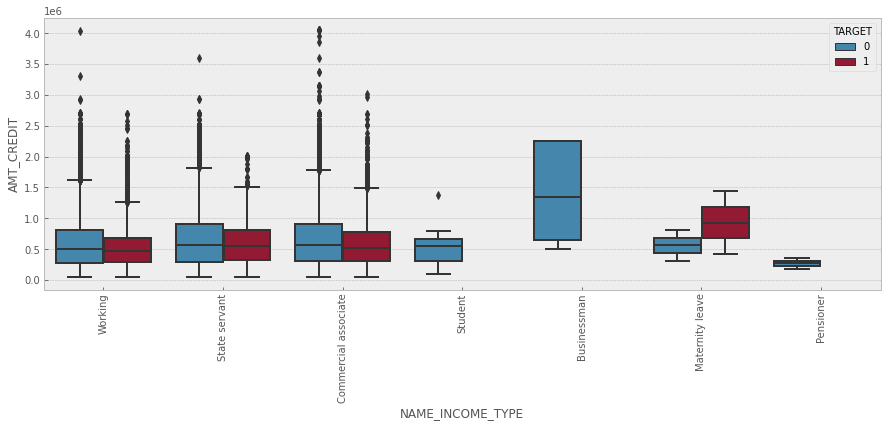

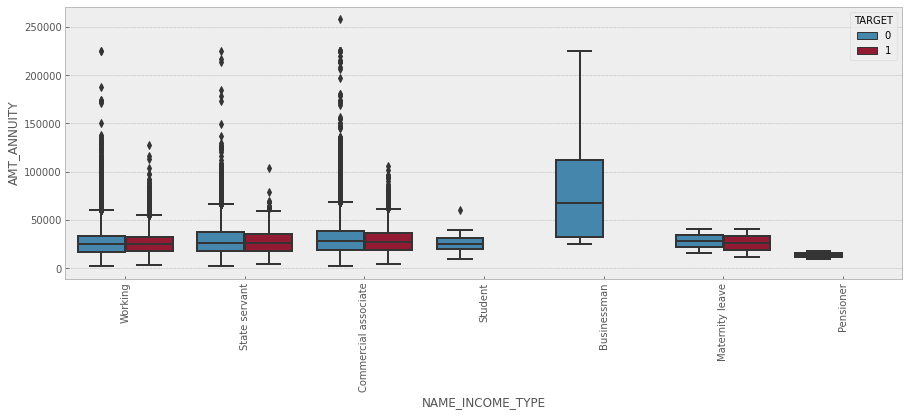

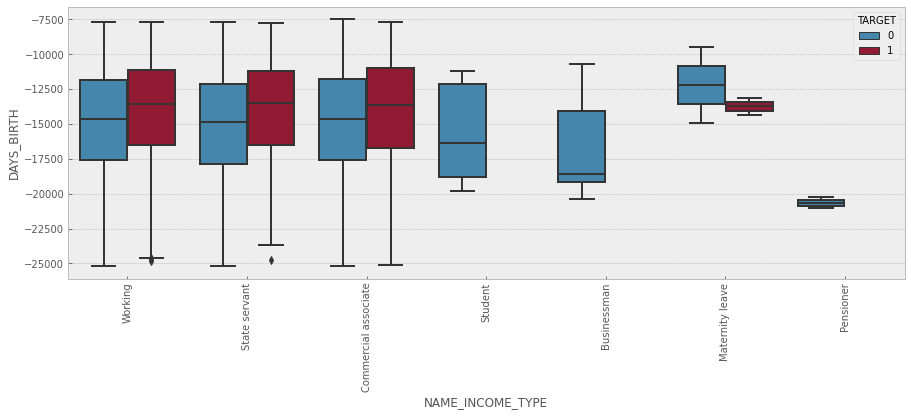

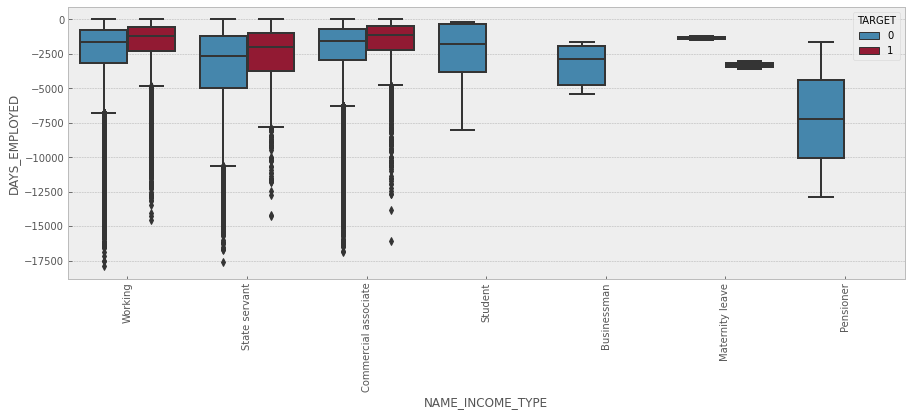

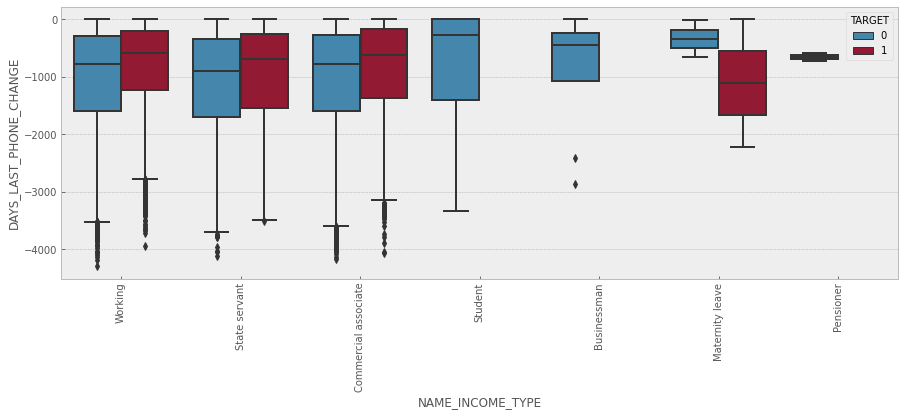

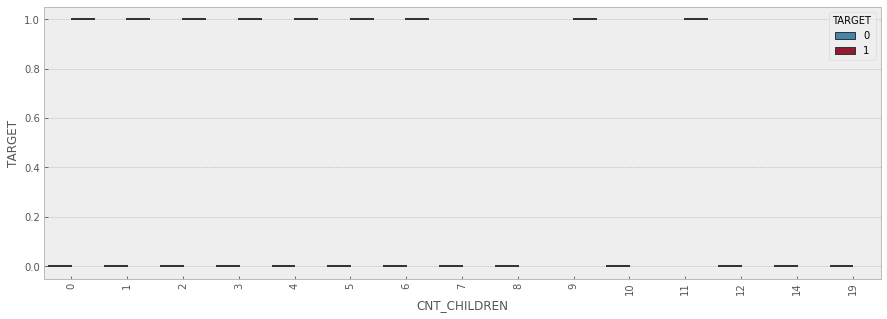

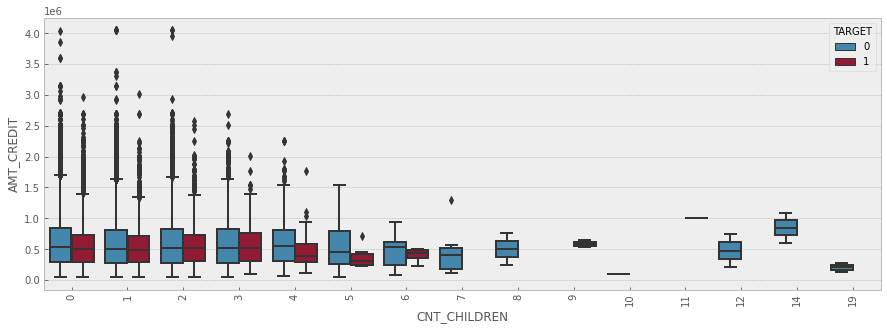

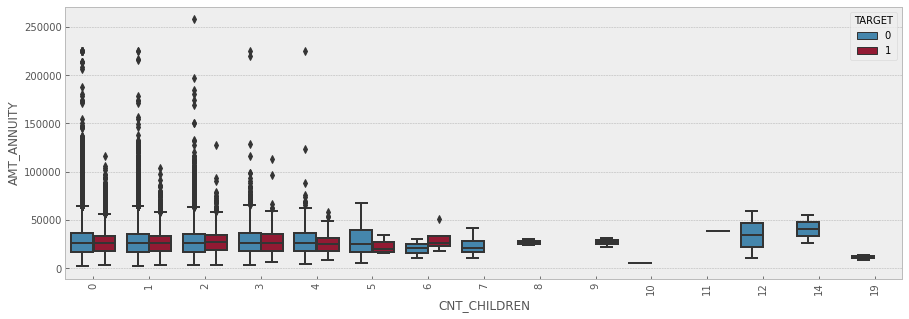

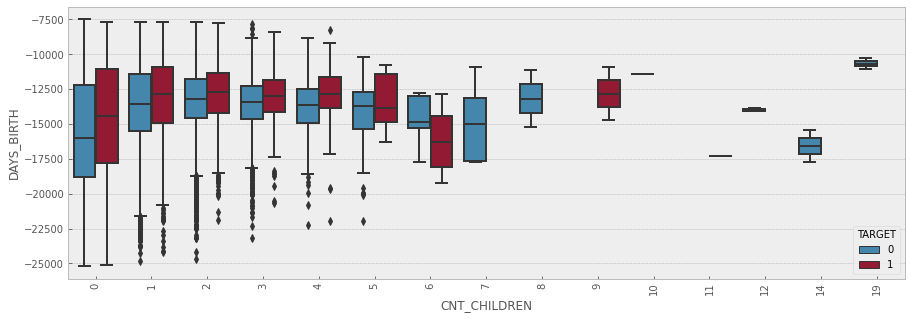

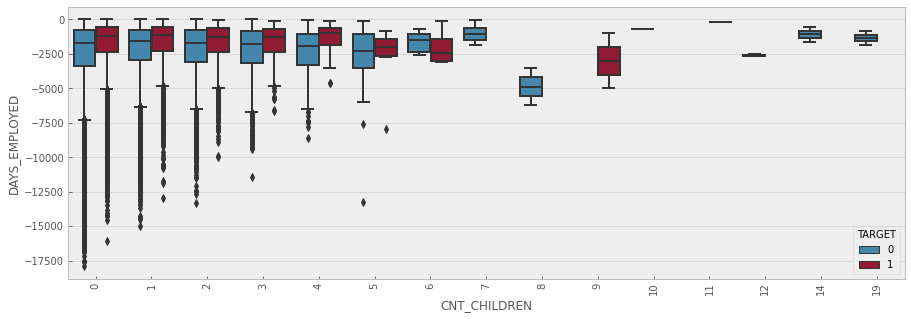

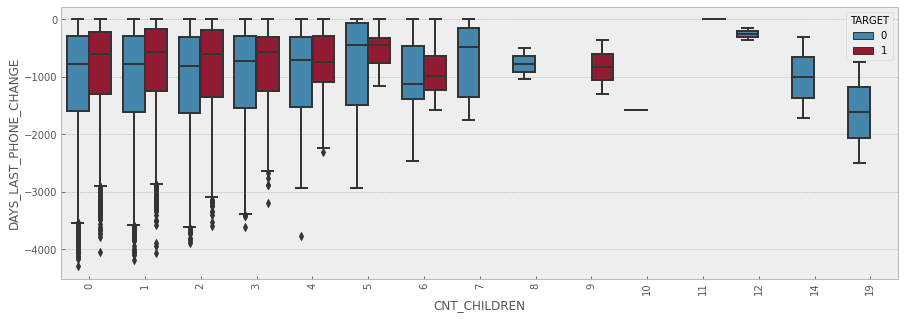

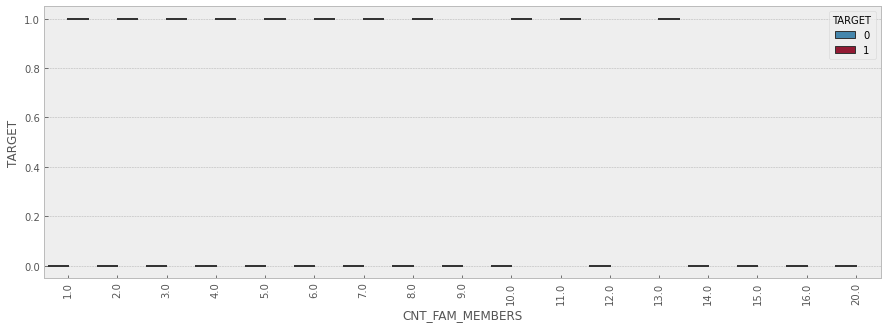

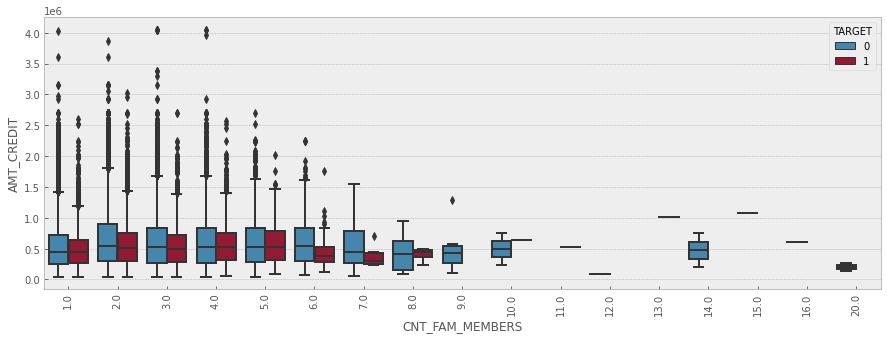

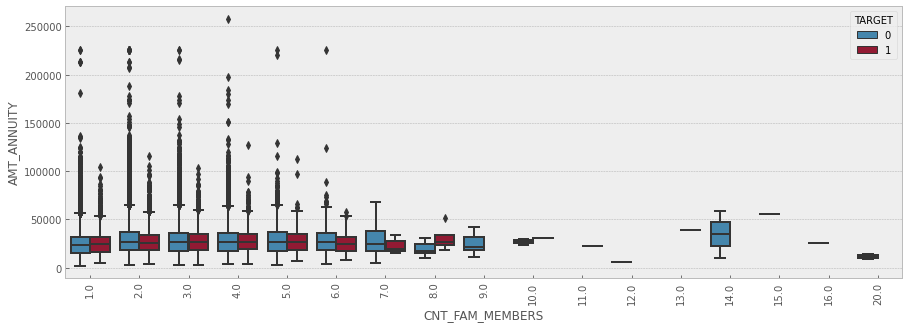

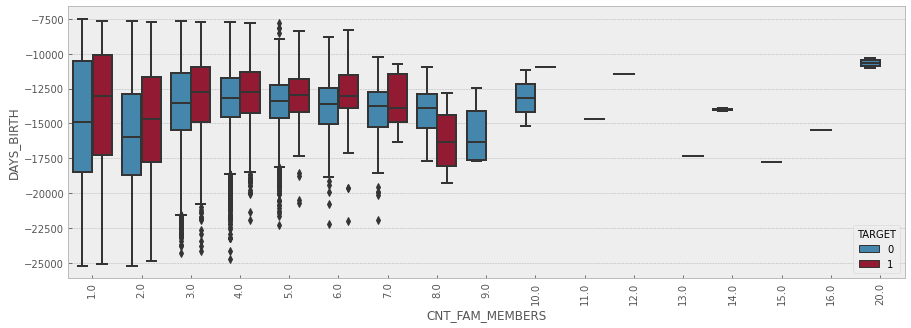

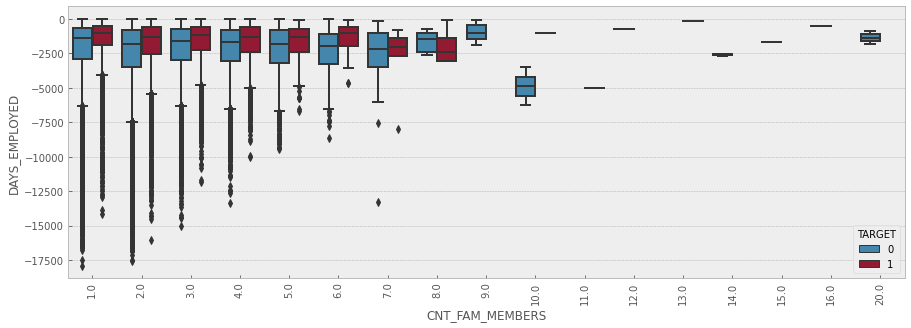

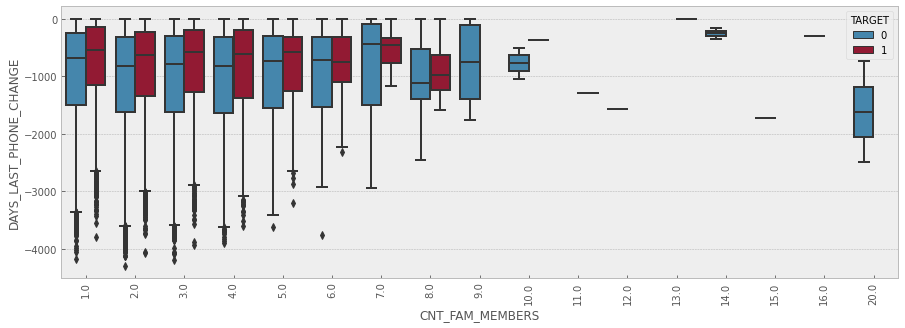

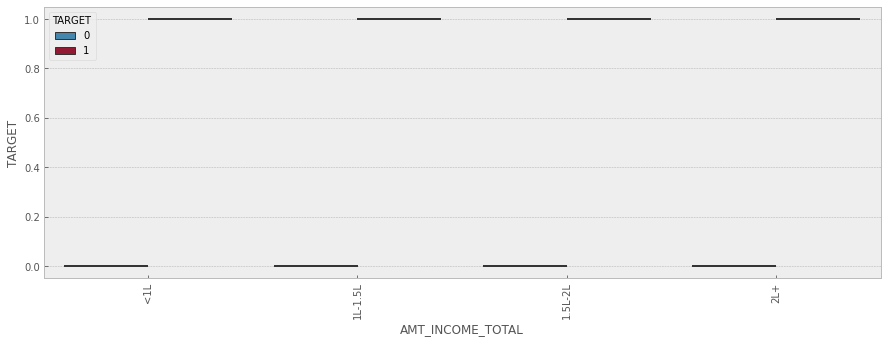

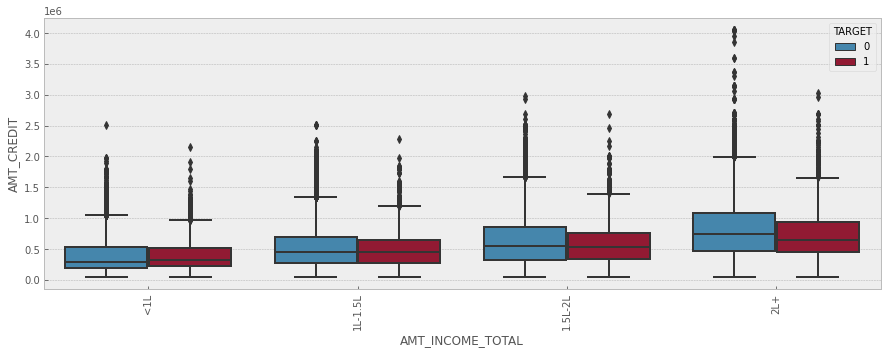

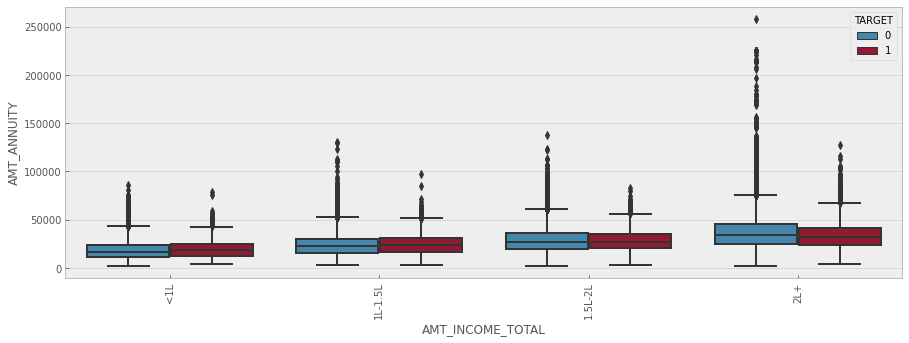

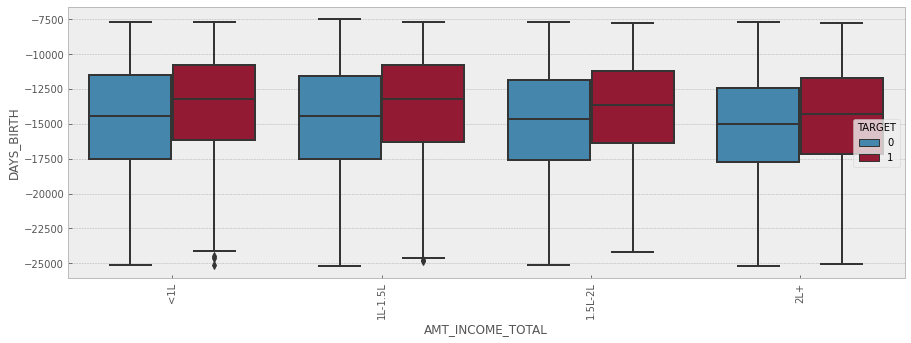

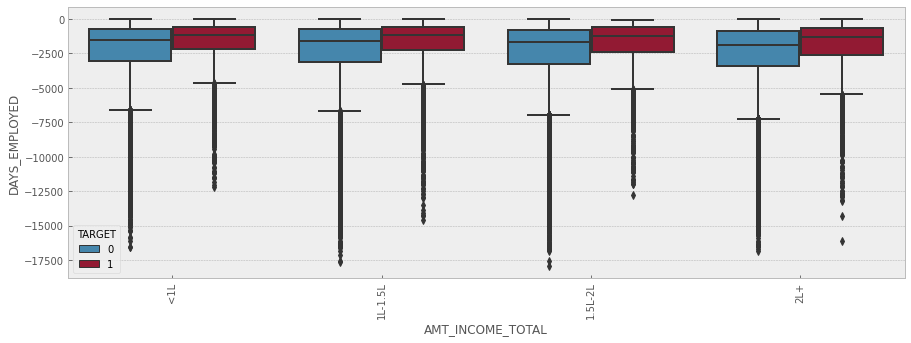

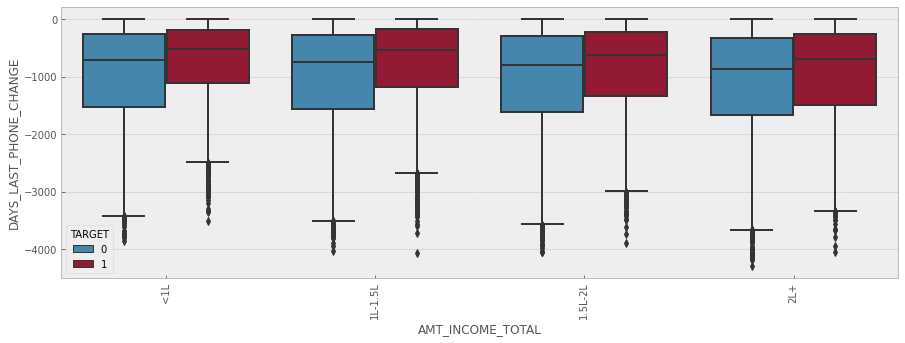

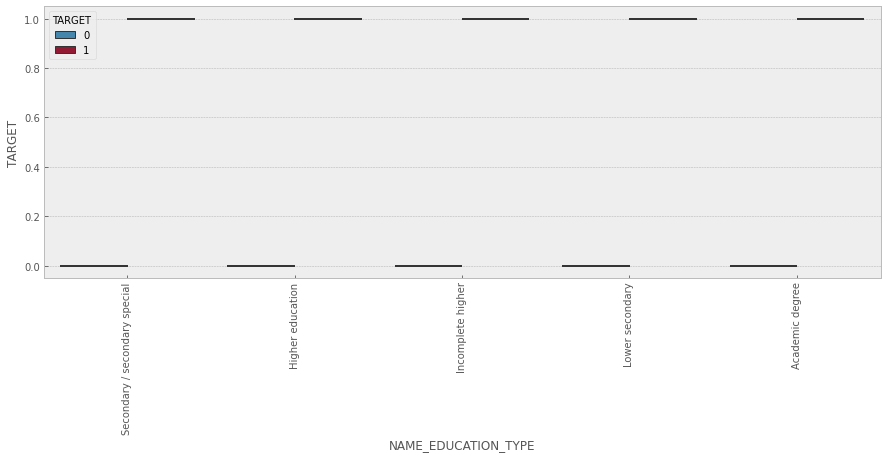

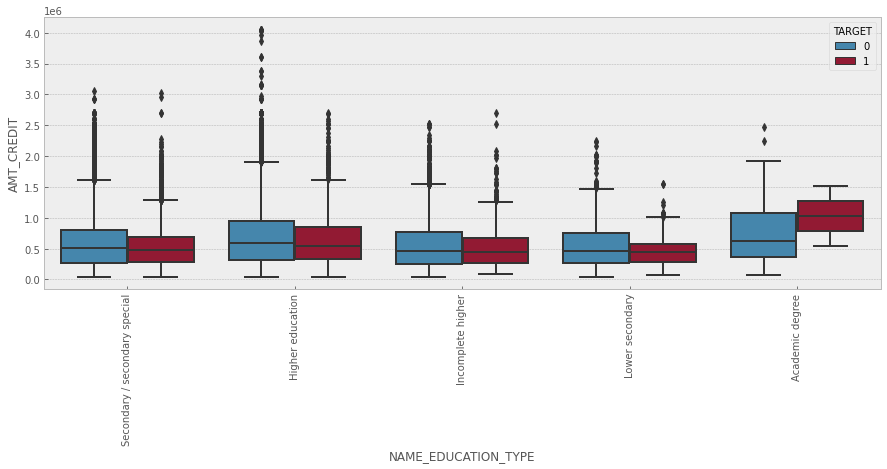

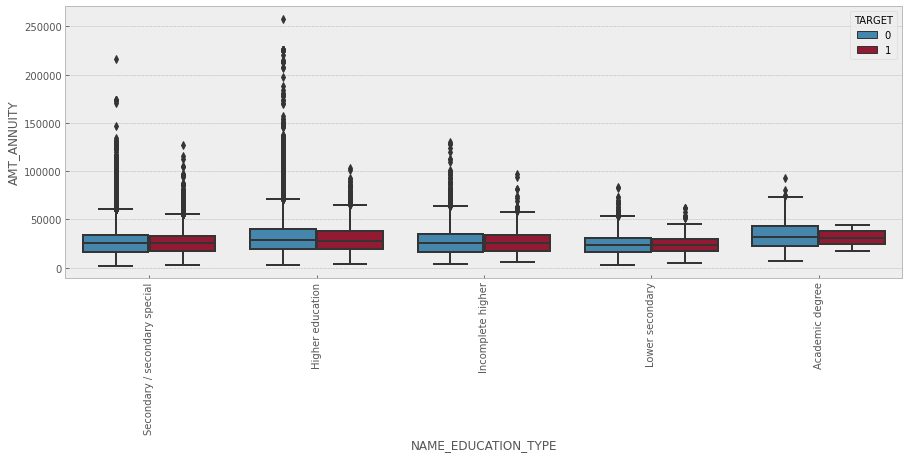

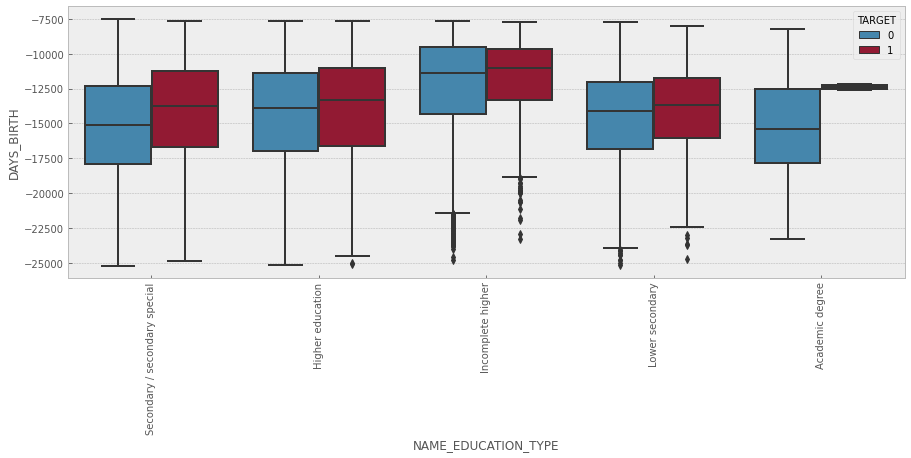

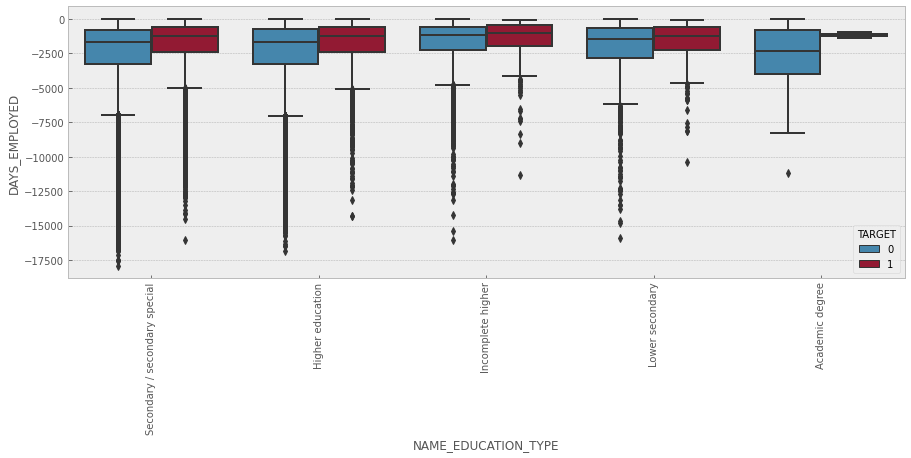

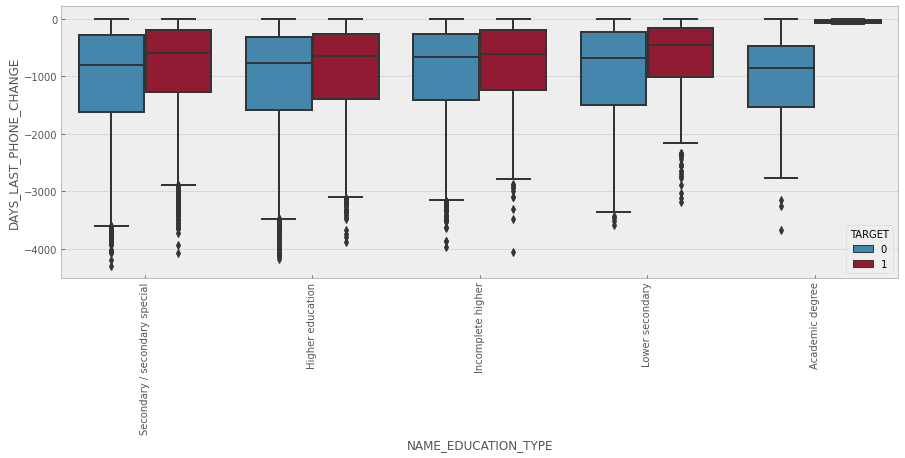

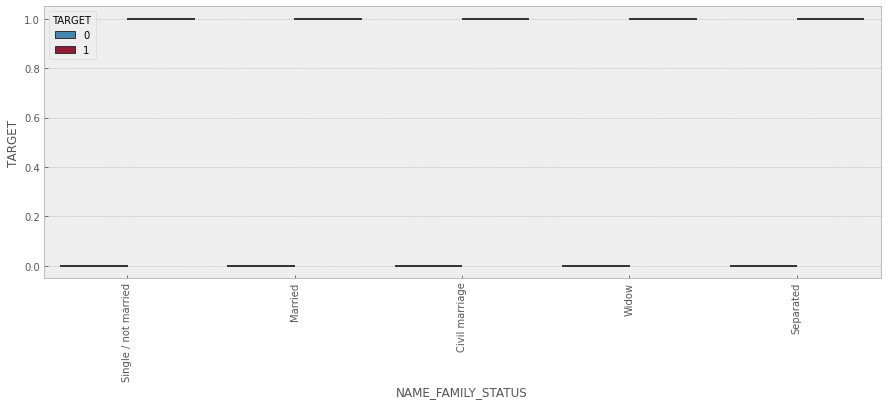

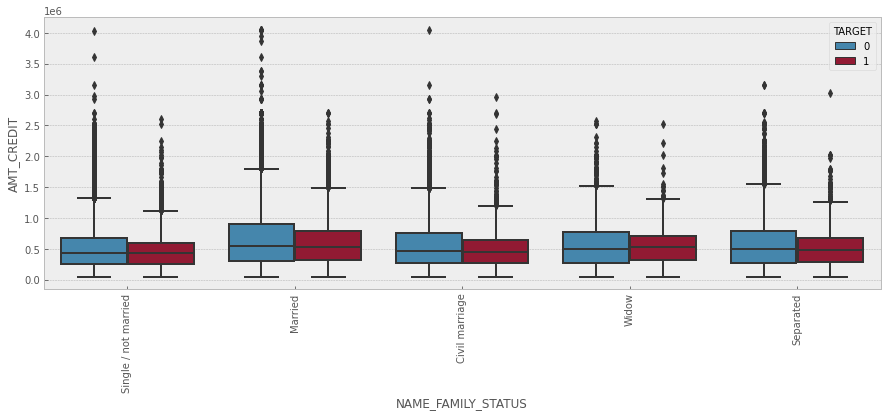

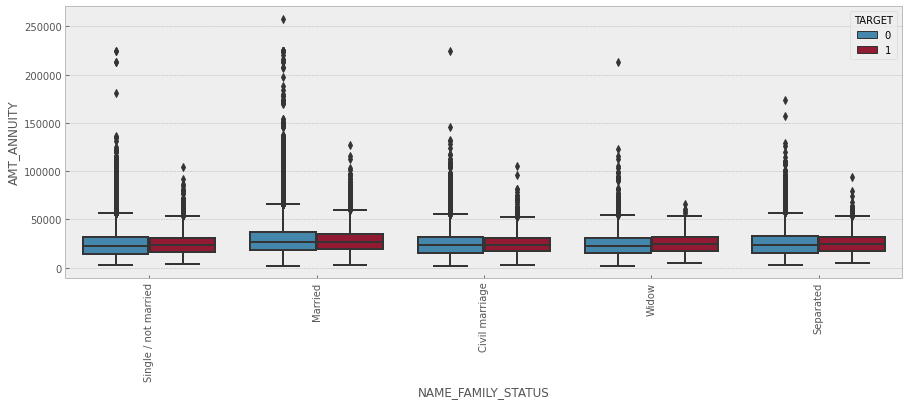

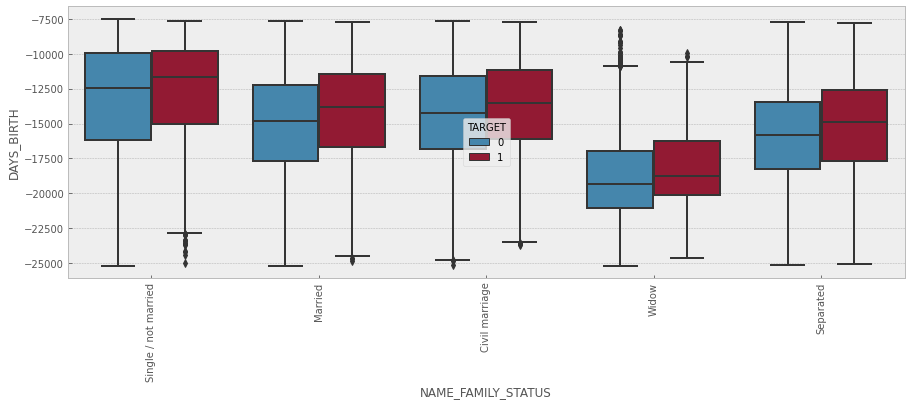

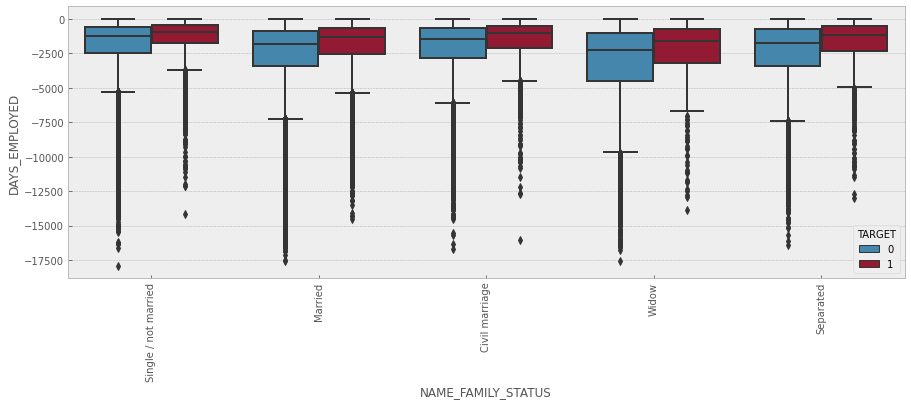

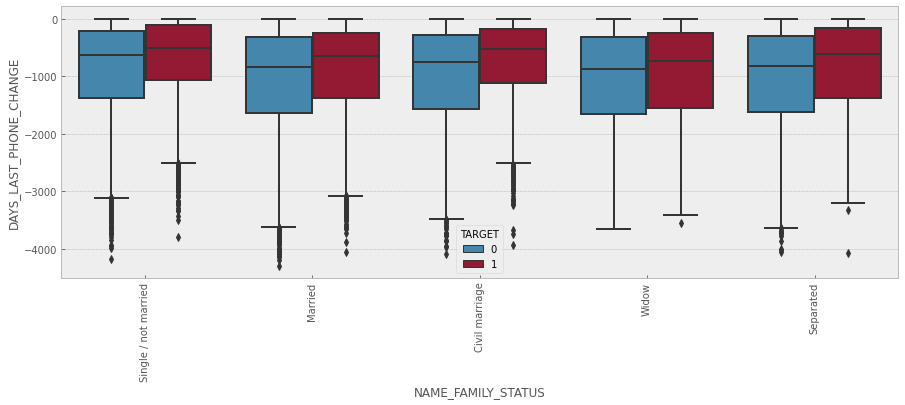

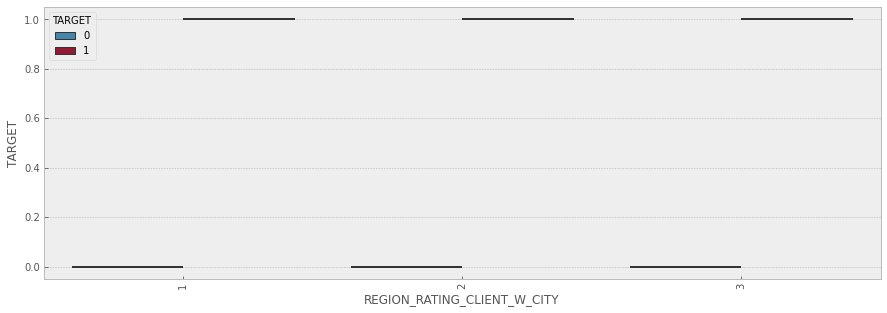

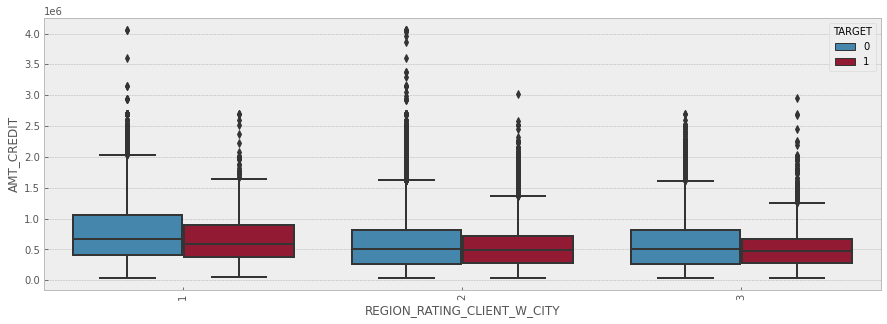

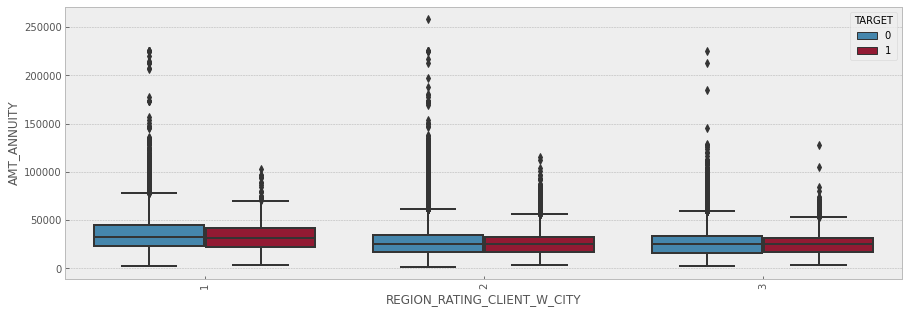

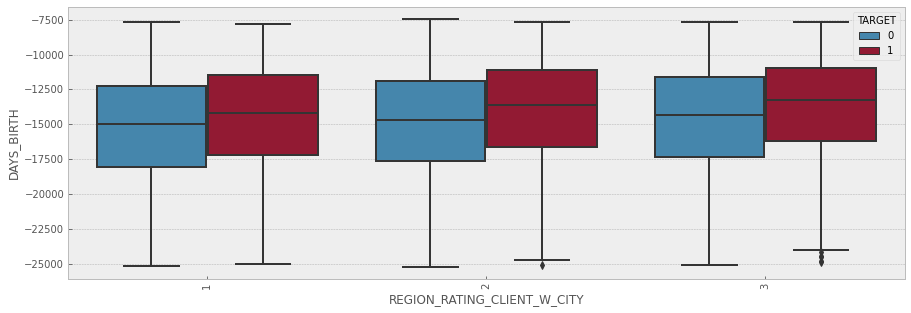

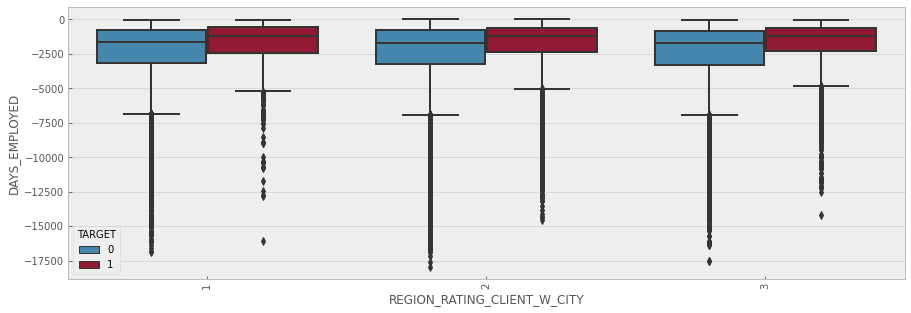

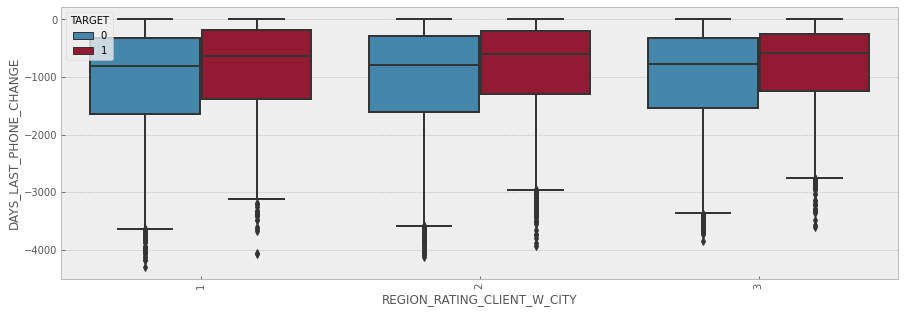

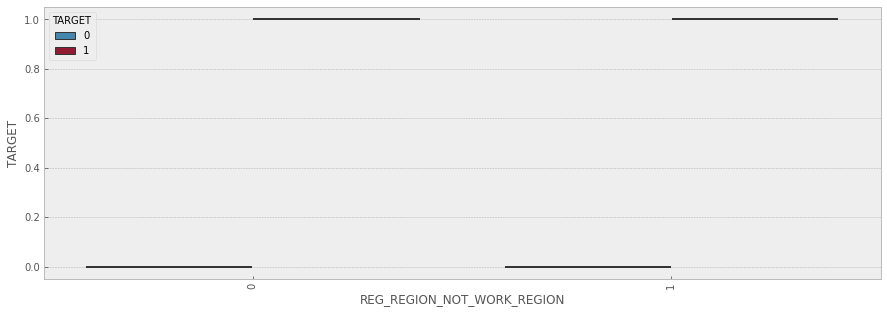

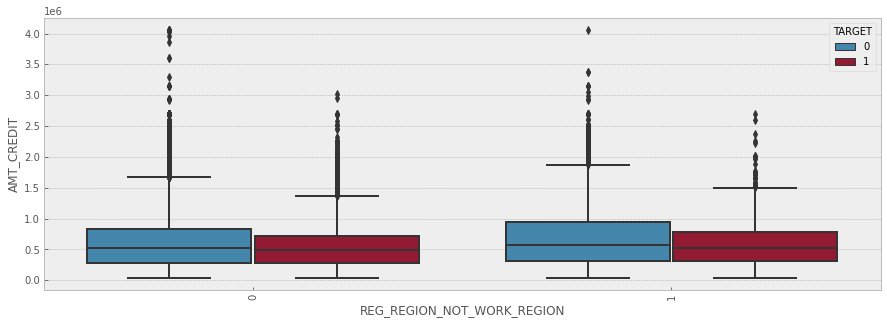

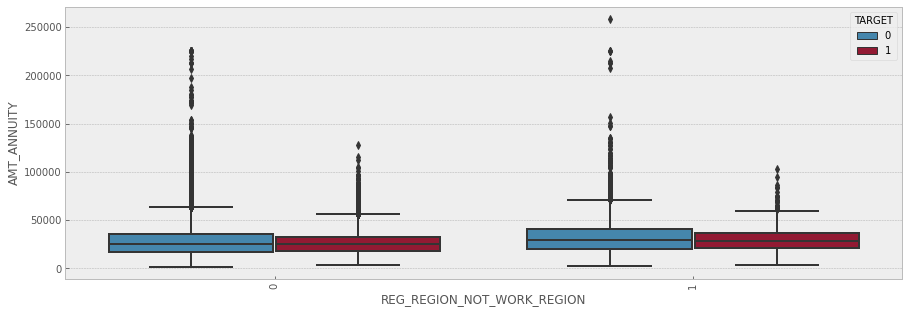

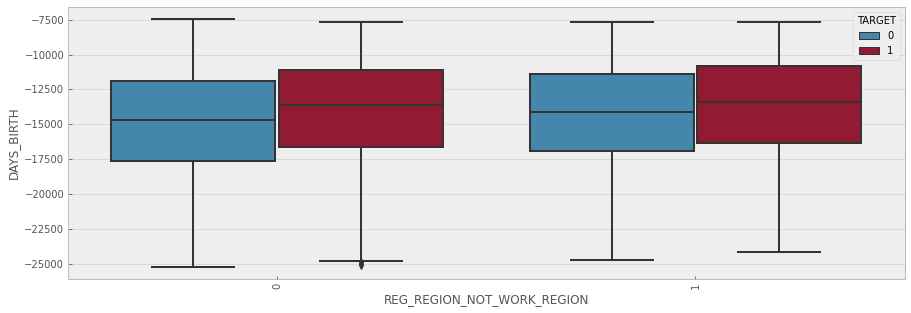

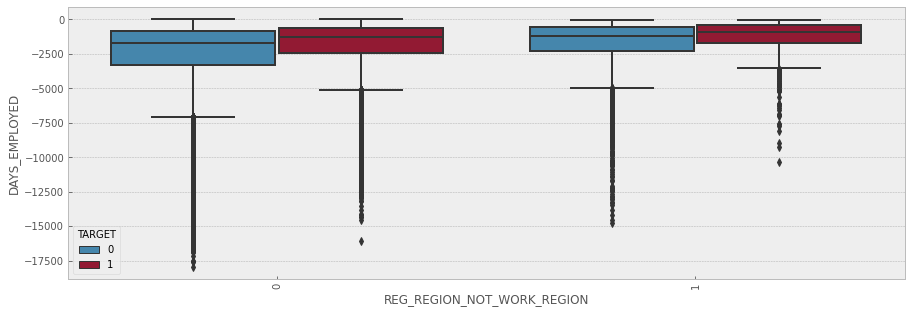

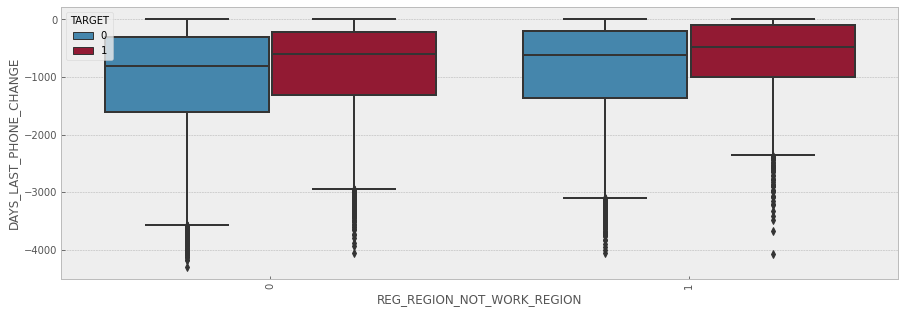

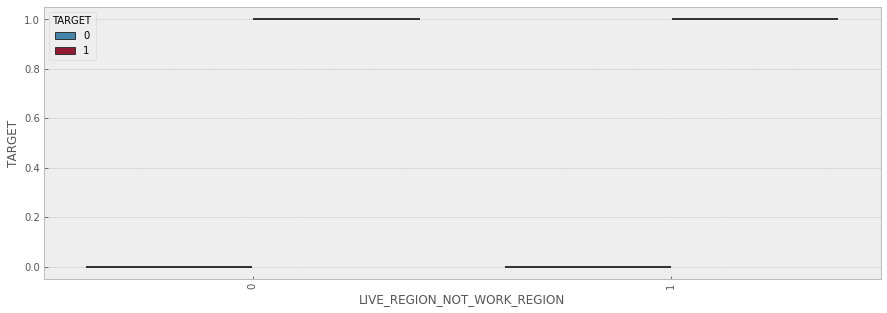

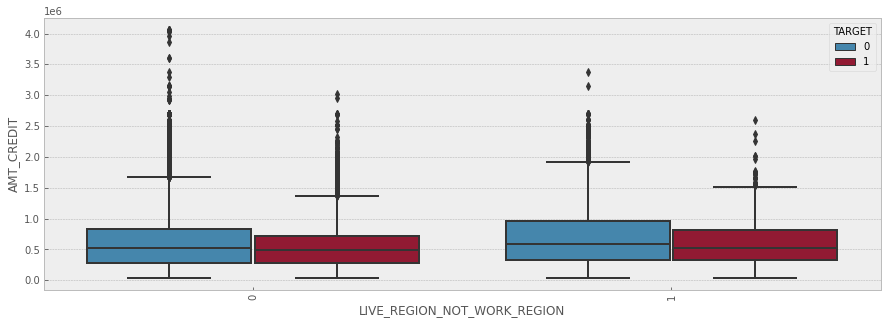

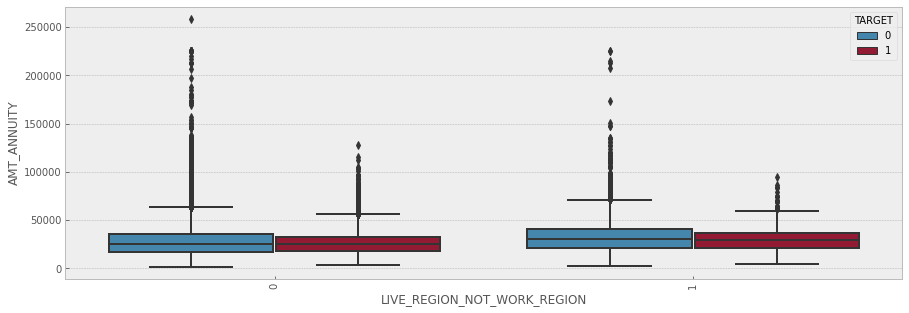

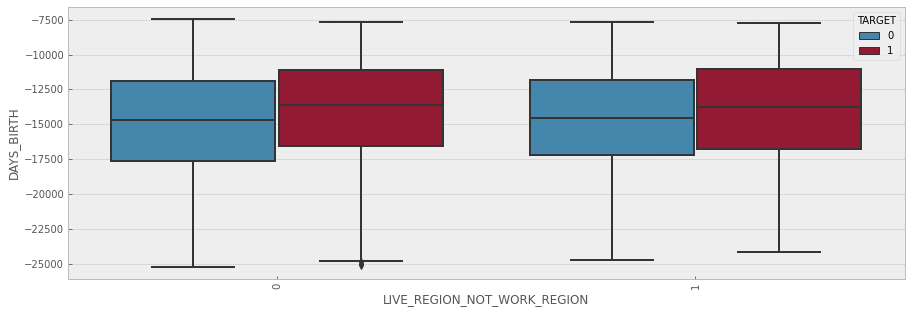

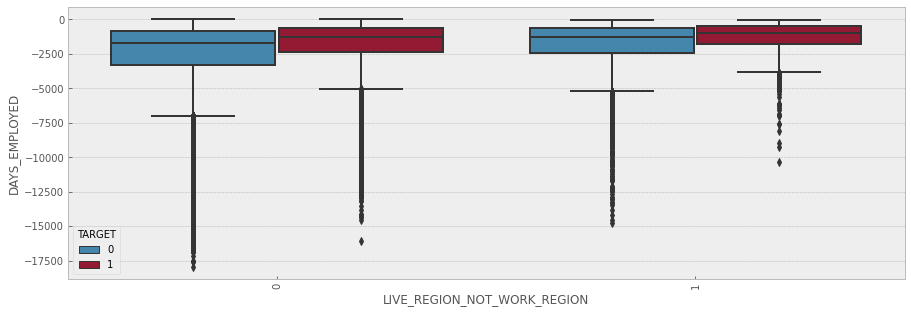

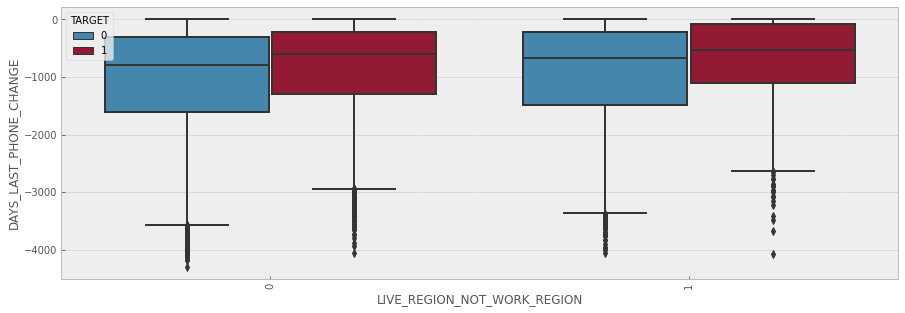

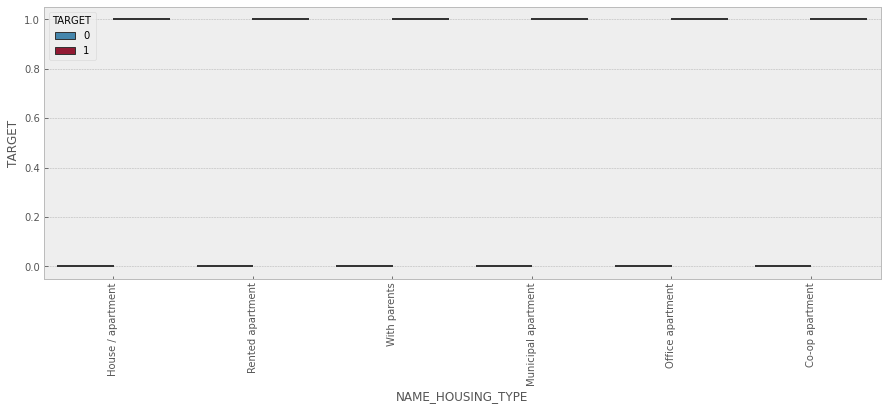

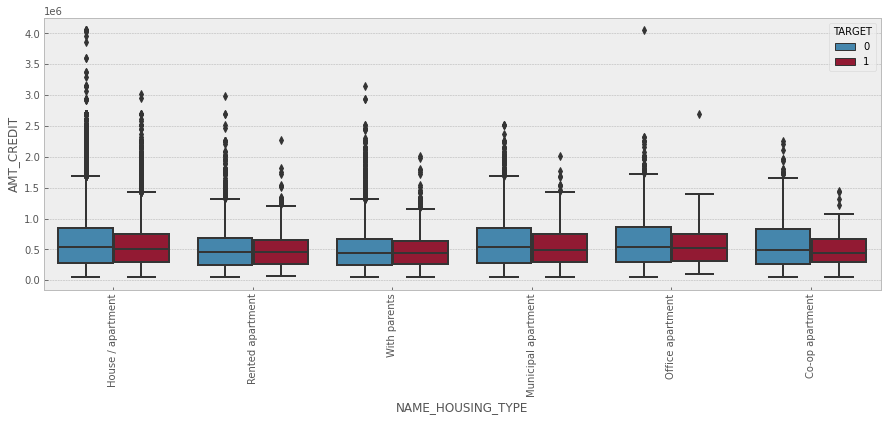

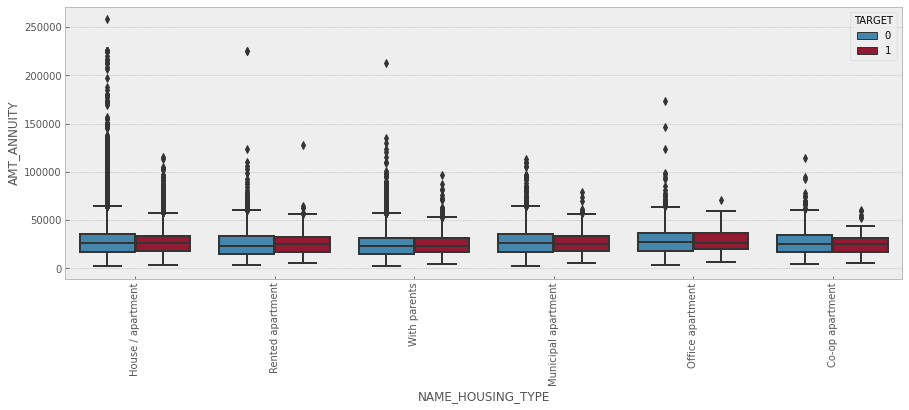

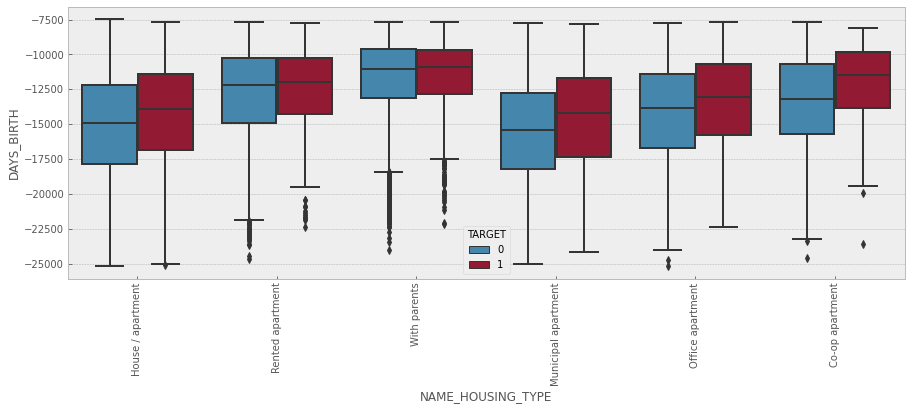

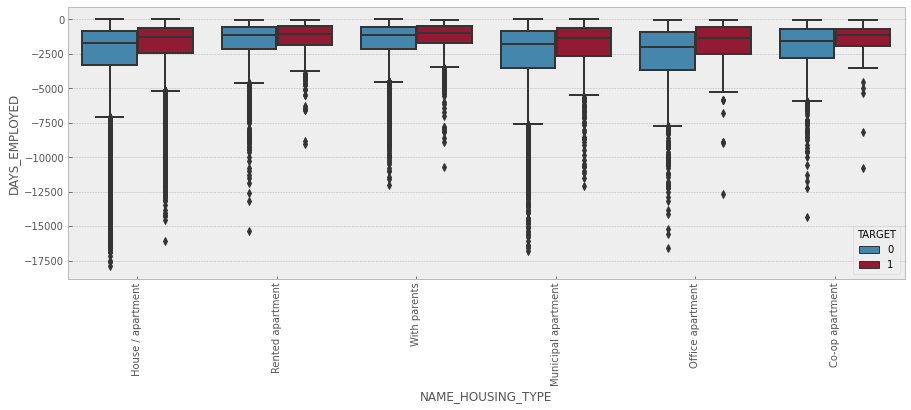

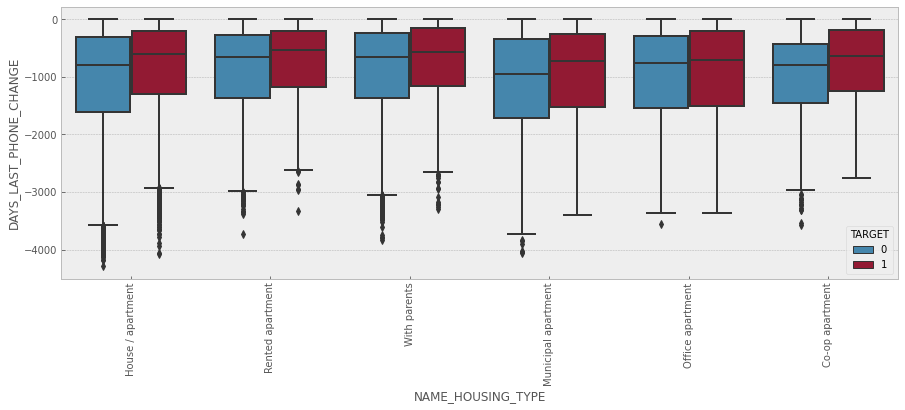

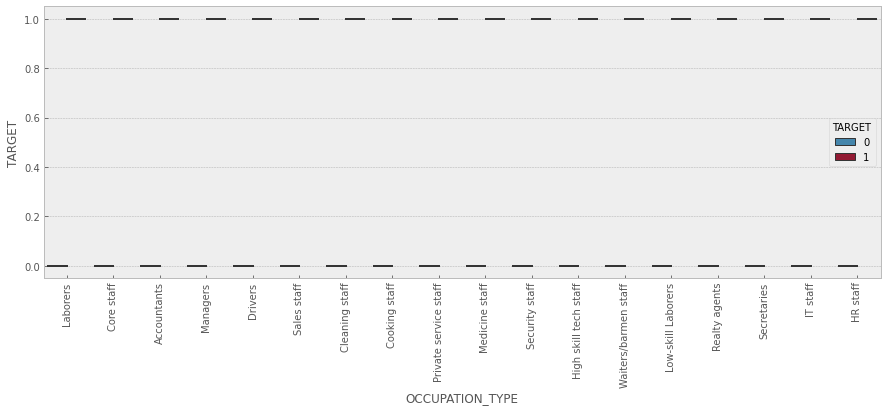

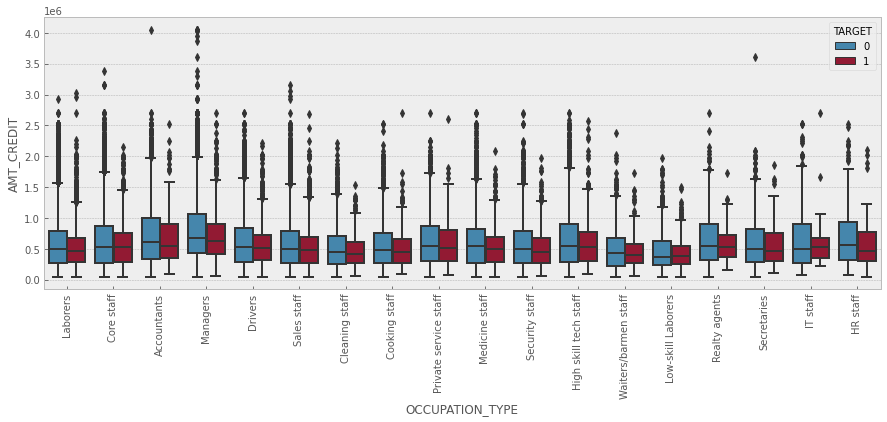

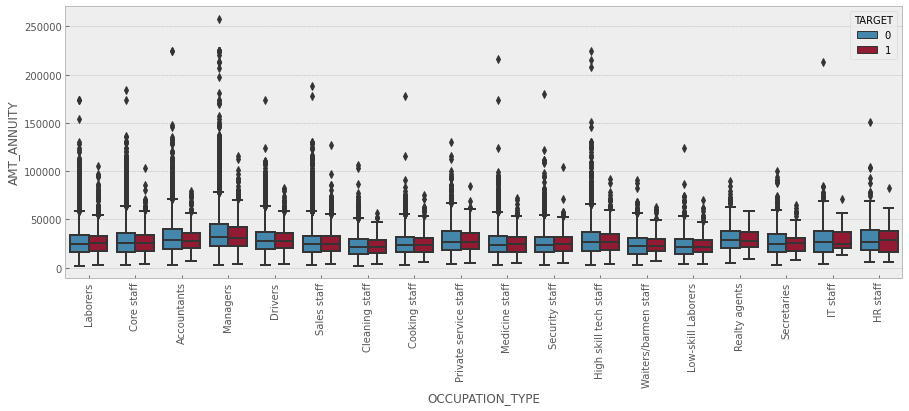

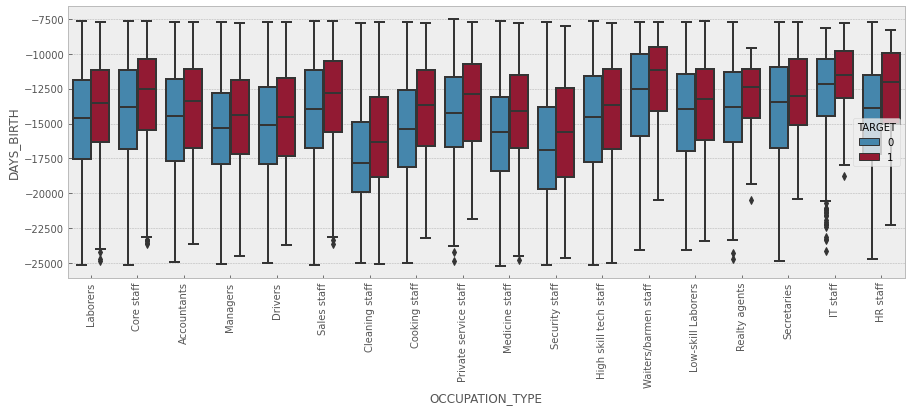

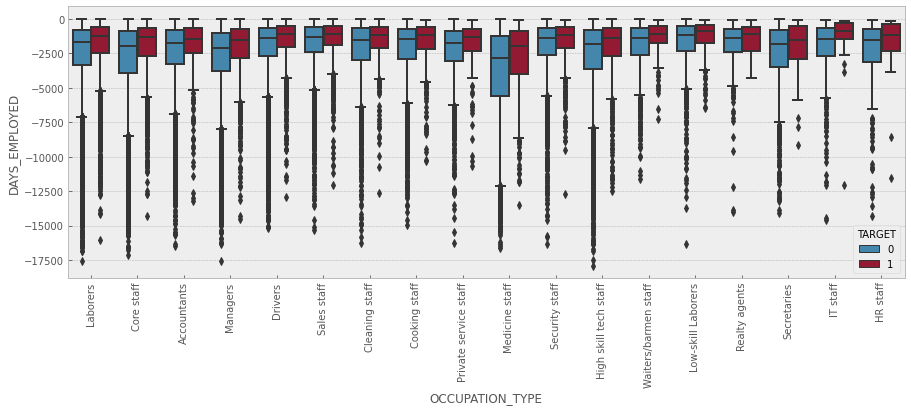

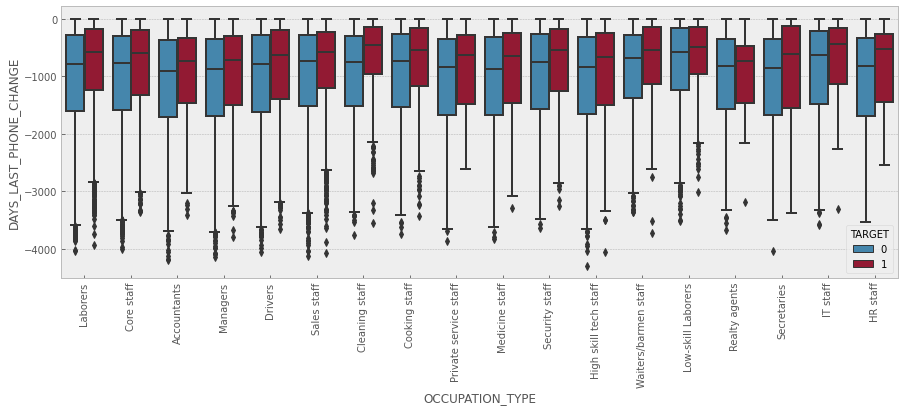

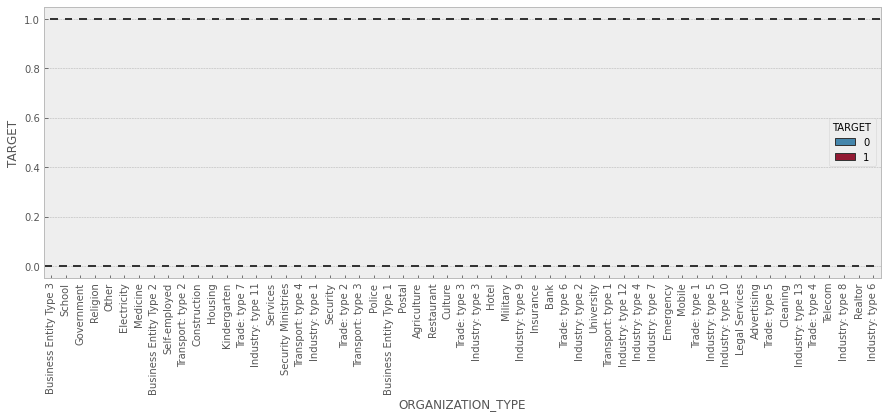

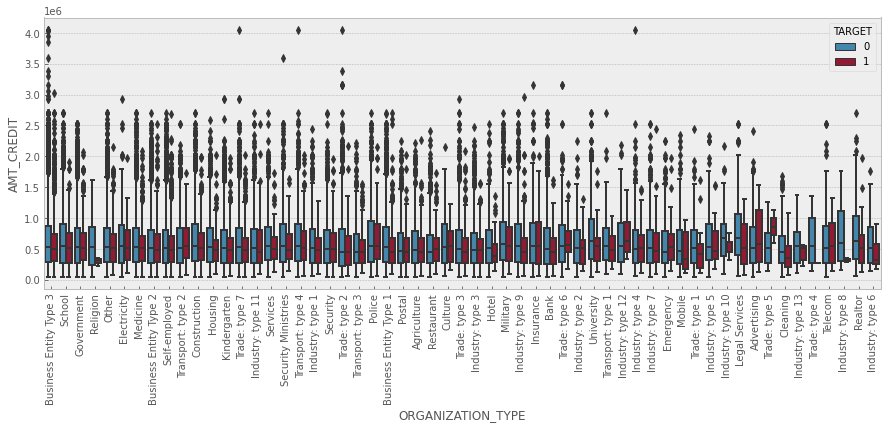

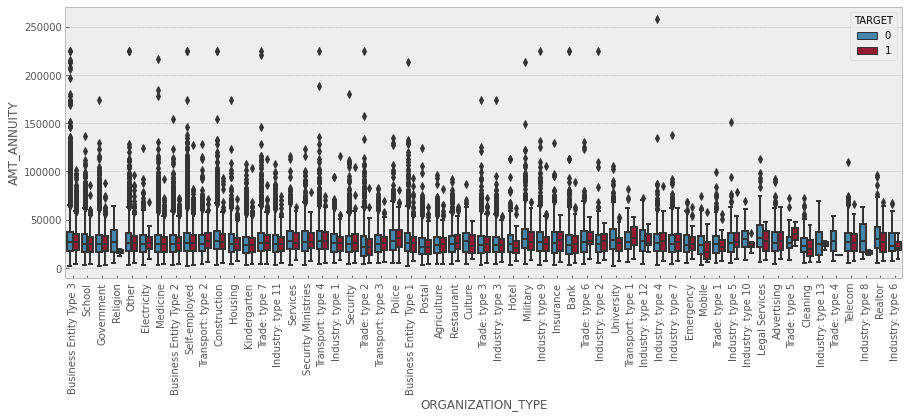

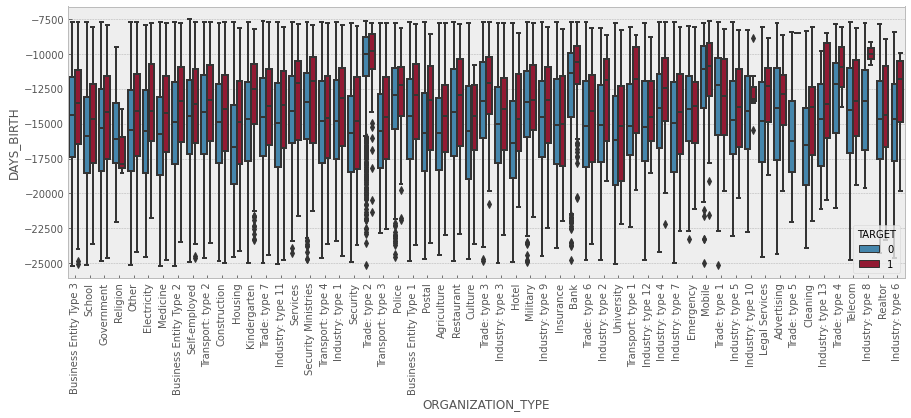

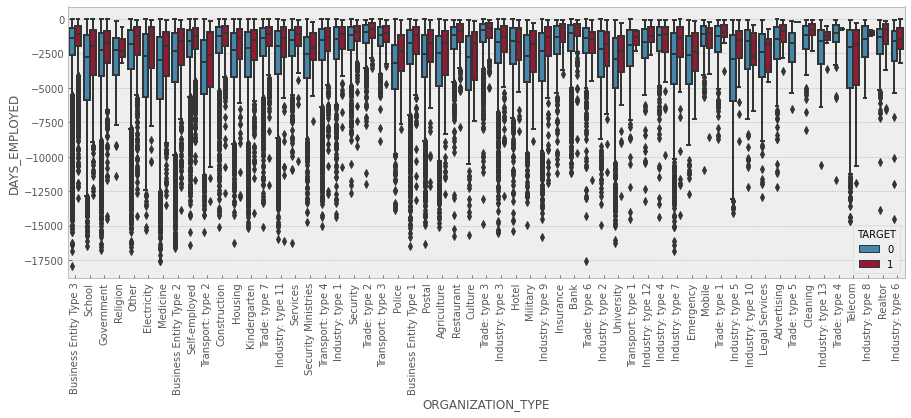

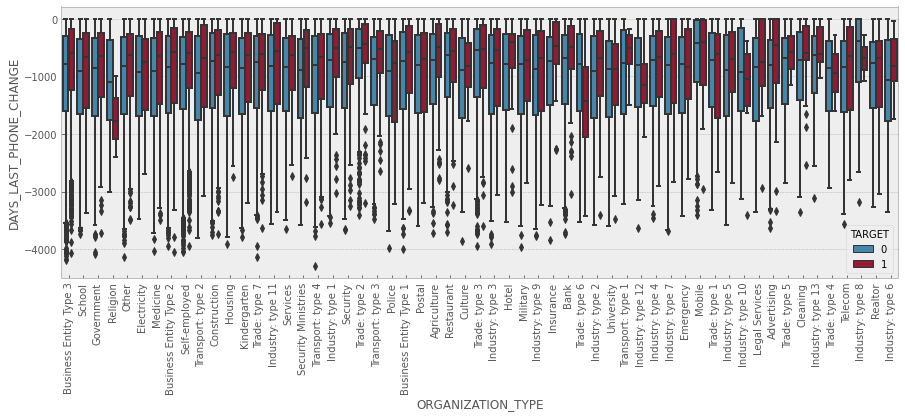

In [109]:
# Multivariate analysis with Category variables on x axis, numerical continuous variable on y axis and Target variable as hue
plt.style.use('bmh')
for i in CAT:
  for j in NUM:
    plt.figure(figsize= [15,5])
    sns.boxplot(data= inp1, x=i, y=j, hue='TARGET')
    plt.xticks(rotation= 90)
    plt.show()

In [110]:
#1 Male and females with age less than 13000 days have higher default rates
#Income type Students, Businessmen and Pensioners have no record of loan default for more than 5L credit and relative employment. 
#1.a.   Businessmen even though have asked for huge credit amount upto 25L has no loan default record
#2.Applicants with Education type academic degree with asked credit amount more than 10L are most likely to default. 
#Safe amount of credit to them is between 5L to 8L
#3.For all family status Vs age there is no conclusion over age and family status affecting default rate as defaulters and non defaulters are within same median age.
#3.a.   Irrespective of day birth median age of defaulters is less than non defaulters


Multivariate Analysis

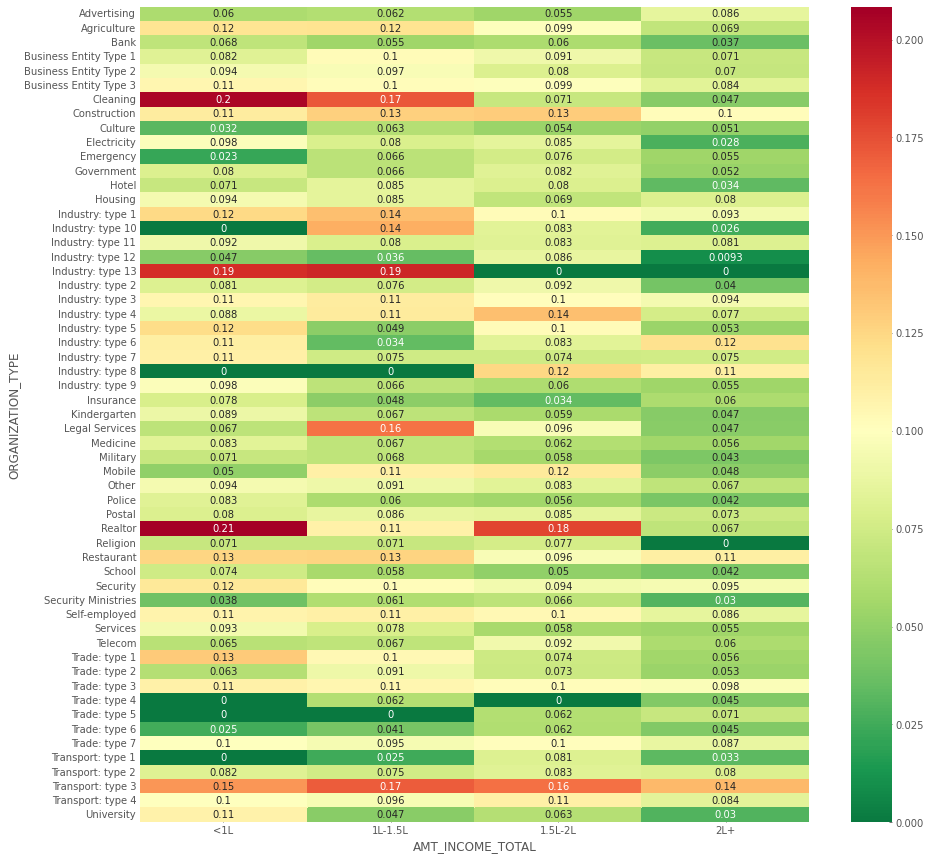

In [111]:
# Lets Do heatmap of pivot table with following index and columns having TARGET as values
res5= pd.pivot_table(data= inp1, index=['ORGANIZATION_TYPE'], columns=['AMT_INCOME_TOTAL'], values= 'TARGET')
plt.figure(figsize= [15,15])
sns.heatmap(res5, annot=True, cmap= 'RdYlGn_r', center=0.1)

In [112]:
# Realtor and Cleaning have more default rate which is more than 20%

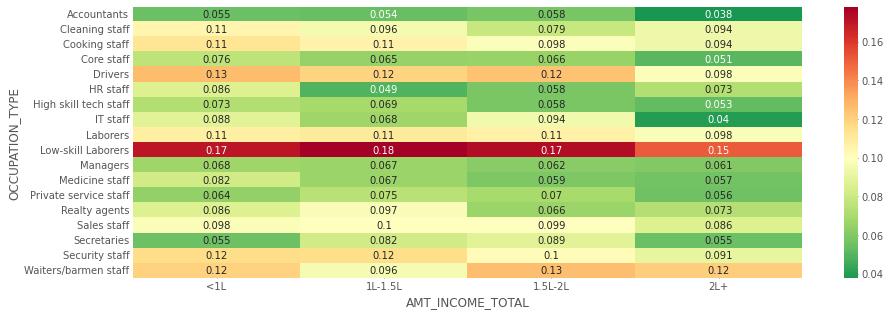

In [113]:
# Another heatmap from following pivot table
res2= pd.pivot_table(data= inp1, index=['OCCUPATION_TYPE'], columns=['AMT_INCOME_TOTAL'], values= 'TARGET')
plt.figure(figsize= [15,5])
sns.heatmap(res2, annot=True, cmap= 'RdYlGn_r', center=0.1)

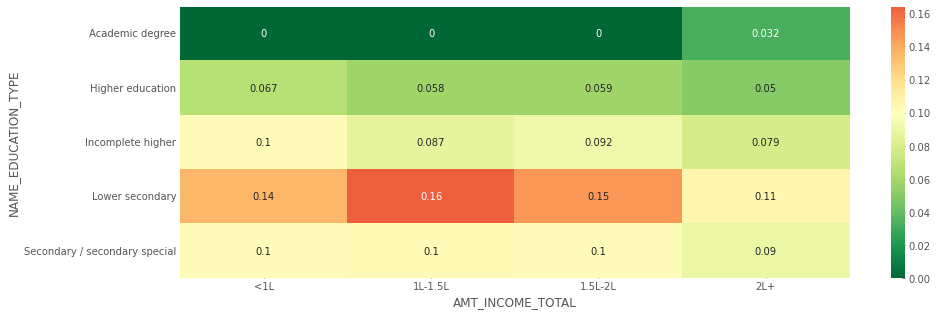

In [114]:
res1= pd.pivot_table(data= inp1, index=['NAME_EDUCATION_TYPE'], columns=['AMT_INCOME_TOTAL'], values= 'TARGET')
plt.figure(figsize= [15,5])
sns.heatmap(res1, annot=True, cmap= 'RdYlGn_r', center=0.1)

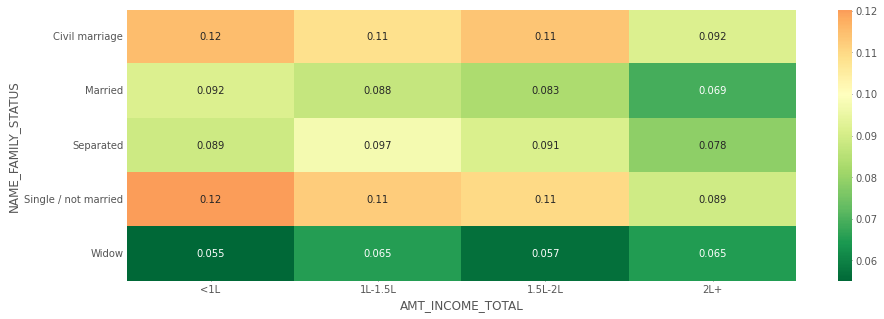

In [115]:
res= pd.pivot_table(data= inp1, index=['NAME_FAMILY_STATUS'], columns=['AMT_INCOME_TOTAL'], values= 'TARGET')
plt.figure(figsize= [15,5])
sns.heatmap(res, annot=True, cmap= 'RdYlGn_r', center=0.1)

In [116]:
# now lets upload previous application data
inp2= pd.read_csv('/content/drive/Othercomputers/My Laptop/UPGRAD/Credit EDA assignment/previous_application.csv')
inp2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [117]:
inp2.shape

(1670214, 37)

In [118]:
# Drop missing values and columns
inp2.dropna(axis=1, inplace=True)
inp2.shape

(1670214, 21)

In [119]:
# check null rows
inp2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [120]:
# lets drop unwanted columns and keep relevant once which are significant to find default pattern
important = ['SK_ID_CURR', 'CODE_REJECT_REASON','NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']
inp2= inp2[important]
inp2.head()

SK_ID_CURR CODE_REJECT_REASON NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0      271877                XAP             Approved         Repeater   
1      108129                XAP             Approved         Repeater   
2      122040                XAP             Approved         Repeater   
3      176158                XAP             Approved         Repeater   
4      202054                 HC              Refused         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  
0              Mobile            POS               XNA  
1                 XNA           Cash            x-sell  
2                 XNA           Cash            x-sell  
3                 XNA           Cash            x-sell  
4                 XNA           Cash           walk-in

In [121]:
# Lets name category variable in previous data as CAT1 for ease of further analysis
CAT1= ['CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE' ]

In [122]:
inp2.shape

(1670214, 7)

In [123]:
# Merge the inp1 and inp2 data
inp3 = pd.merge(left=inp1,right=inp2, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
inp3.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1           M            N               Y             0   
1      100003       0           F            N               N             0   
2      100003       0           F            N               N             0   
3      100003       0           F            N               N             0   
4      100004       0           M            Y               Y             0   

  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  ...  \
0              2L+    406597.5      24700.5          Working  ...   
1              2L+   1293502.5      35698.5    State servant  ...   
2              2L+   1293502.5      35698.5    State servant  ...   
3              2L+   1293502.5      35698.5    State servant  ...   
4              <1L    135000.0       6750.0          Working  ...   

        ORGANIZATION_TYPE DAYS_LAST_PHONE_CHANGE OCCUPATION_TYPE  \
0  Business Entity Type 3                -1134.0        Laborers   
1                  School                 -828.0      Core staff   
2                  School                 -828.0      Core staff   
3                  School                 -828.0      Core staff   
4              Government                 -815.0        Laborers   

   AMT_GOODS_PRICE  CODE_REJECT_REASON  NAME_CONTRACT_STATUS  \
0         351000.0                 XAP              Approved   
1        1129500.0                 XAP              Approved   
2        1129500.0                 XAP              Approved   
3        1129500.0                 XAP              Approved   
4         135000.0                 XAP              Approved   

   NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  NAME_PORTFOLIO NAME_PRODUCT_TYPE  
0               New              Vehicles             POS               XNA  
1          Repeater                   XNA            Cash            x-sell  
2         Refreshed             Furniture             POS               XNA  
3         Refreshed  Consumer Electronics             POS               XNA  
4               New                Mobile             POS               XNA  

[5 rows x 29 columns]

In [124]:
# We can see duplicates lets drop them
inp3.drop_duplicates(subset= ['SK_ID_CURR'],keep='first', inplace=True)
inp3.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       100002       1           M            N               Y             0   
1       100003       0           F            N               N             0   
4       100004       0           M            Y               Y             0   
5       100006       0           F            N               Y             0   
14      100007       0           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  ...  \
0               2L+    406597.5      24700.5          Working  ...   
1               2L+   1293502.5      35698.5    State servant  ...   
4               <1L    135000.0       6750.0          Working  ...   
5           1L-1.5L    312682.5      29686.5          Working  ...   
14          1L-1.5L    513000.0      21865.5          Working  ...   

         ORGANIZATION_TYPE DAYS_LAST_PHONE_CHANGE OCCUPATION_TYPE  \
0   Business Entity Type 3                -1134.0        Laborers   
1                   School                 -828.0      Core staff   
4               Government                 -815.0        Laborers   
5   Business Entity Type 3                 -617.0        Laborers   
14                Religion                -1106.0      Core staff   

    AMT_GOODS_PRICE  CODE_REJECT_REASON  NAME_CONTRACT_STATUS  \
0          351000.0                 XAP              Approved   
1         1129500.0                 XAP              Approved   
4          135000.0                 XAP              Approved   
5          297000.0                 XAP              Approved   
14         513000.0                 XAP              Approved   

    NAME_CLIENT_TYPE  NAME_GOODS_CATEGORY  NAME_PORTFOLIO NAME_PRODUCT_TYPE  
0                New             Vehicles             POS               XNA  
1           Repeater                  XNA            Cash            x-sell  
4                New               Mobile             POS               XNA  
5           Repeater                  XNA            Cash            x-sell  
14          Repeater                  XNA            Cash           walk-in  

[5 rows x 29 columns]

In [125]:
inp3.shape

(210885, 29)

In [126]:
# Check null rows
inp3.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                  0
DAYS_LAST_PHONE_CHANGE             0
OCCUPATION_TYPE                    0
AMT_GOODS_PRICE                    0
CODE_REJECT_REASON             11294
NAME_CONTRACT_STATUS           11294
NAME_CLIENT_TYPE               11294
NAME_GOODS_CATEGORY            11294
N

In [127]:
# remove null rows
inp3= inp3[~inp3.CODE_REJECT_REASON.isnull()]
inp3= inp3[~inp3.NAME_CLIENT_TYPE.isnull()]
inp3= inp3[~inp3.NAME_GOODS_CATEGORY.isnull()]
inp3= inp3[~inp3.NAME_PORTFOLIO.isnull()]
inp3= inp3[~inp3.NAME_PRODUCT_TYPE.isnull()]

In [128]:
inp3.shape

(199591, 29)

countplot of CODE_REJECT_REASON


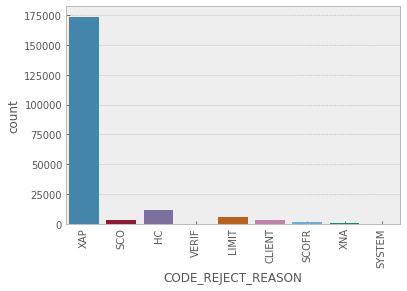

countplot of NAME_CONTRACT_STATUS


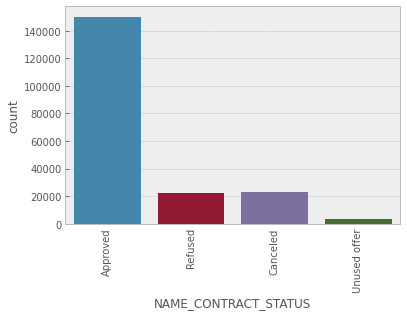

countplot of NAME_CLIENT_TYPE


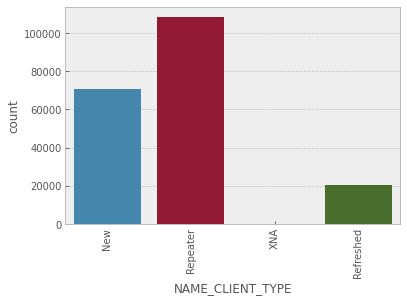

countplot of NAME_GOODS_CATEGORY


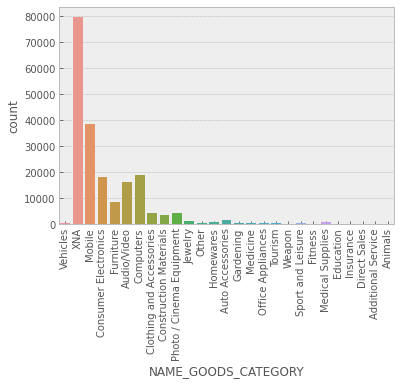

countplot of NAME_PORTFOLIO


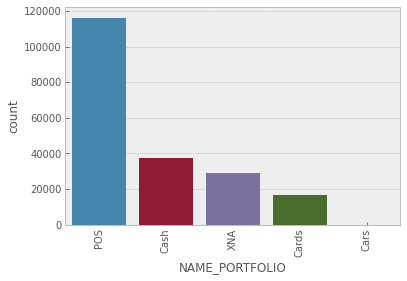

countplot of NAME_PRODUCT_TYPE


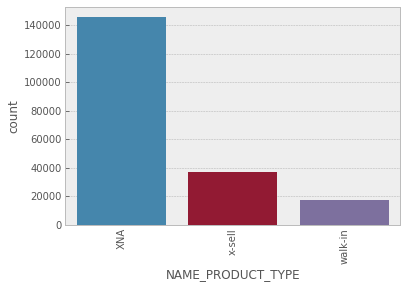

In [129]:
# univariate analysis of previous data 
# Lets check the spread of category variables in it
for i in CAT1:
  print("countplot of",i)
  sns.countplot(inp3[i])
  plt.xticks(rotation= 90)
  plt.show()

In [130]:
# Check what percentage of previous applications were approved
inp3.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.752499
Canceled        0.117270
Refused         0.112881
Unused offer    0.017350
Name: NAME_CONTRACT_STATUS, dtype: float64

In [131]:
# 75% of previous loans are approved

Default rate of  CODE_REJECT_REASON


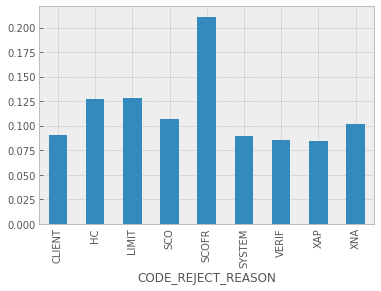

Default rate of  NAME_CONTRACT_STATUS


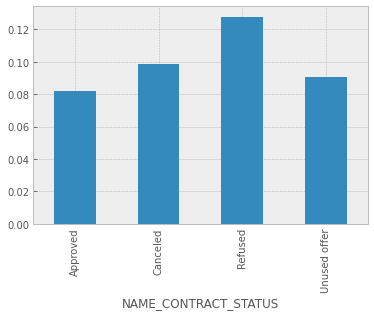

Default rate of  NAME_CLIENT_TYPE


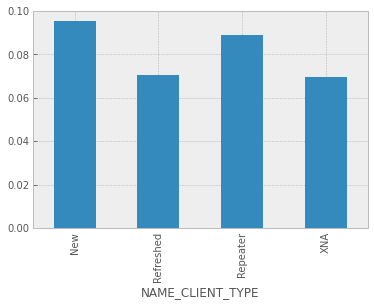

Default rate of  NAME_GOODS_CATEGORY


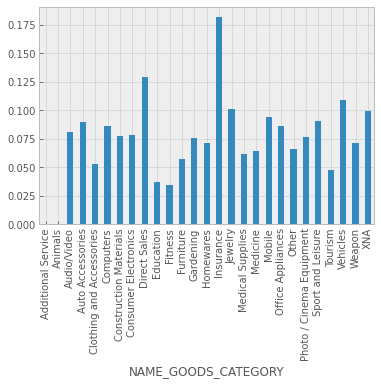

Default rate of  NAME_PORTFOLIO


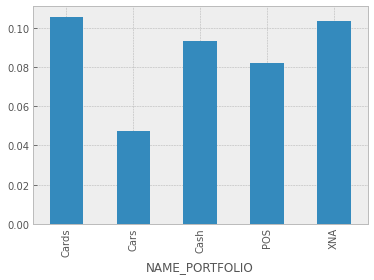

Default rate of  NAME_PRODUCT_TYPE


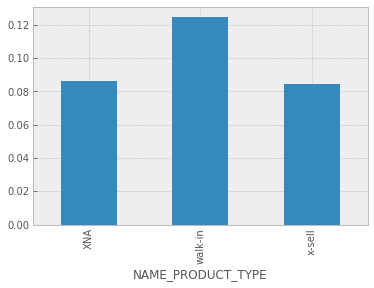

In [132]:
# bivariate analysis of category variables in merged data wrt TARGET veriable
for i in CAT1:
  print('Default rate of ', i)
  inp3.groupby(i)['TARGET'].mean().plot.bar()
  plt.yticks()
  plt.show()

In [133]:
# Previously Refused name contract status applicants 12% more likely to default
#Previously rejected candidates with code reject reason SCOFR are 20% more likely to default
#Previous applicants with name goods category insurance are 17% more likely to default followed by sales with 12%


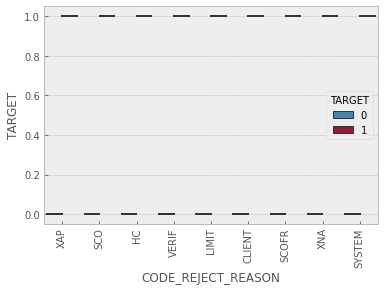

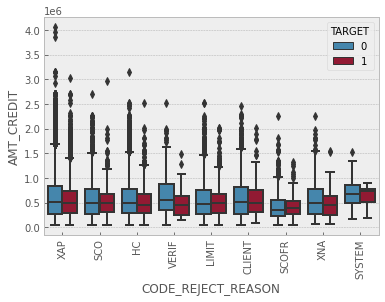

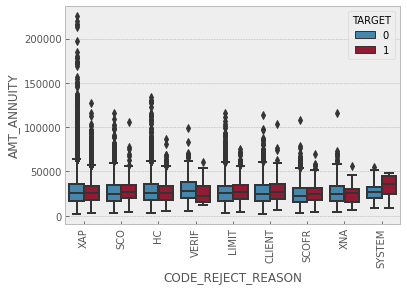

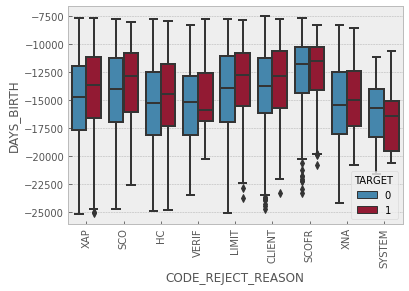

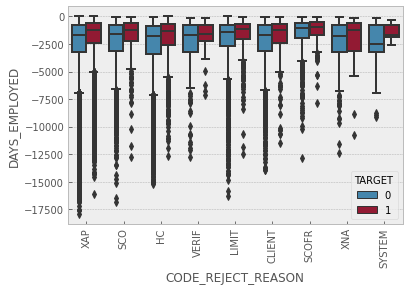

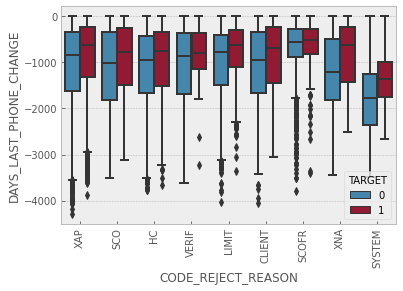

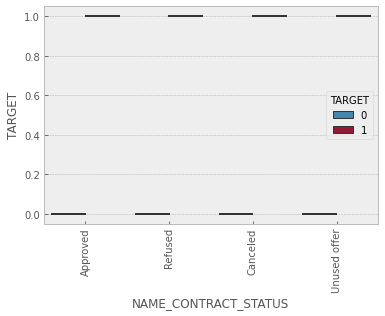

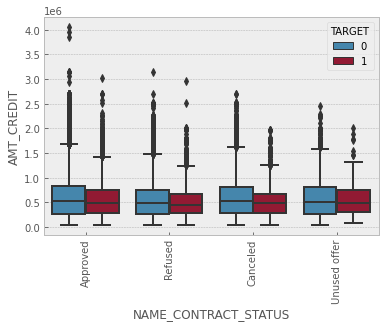

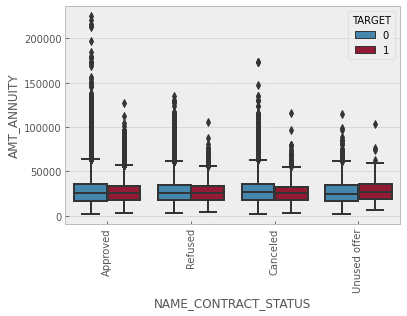

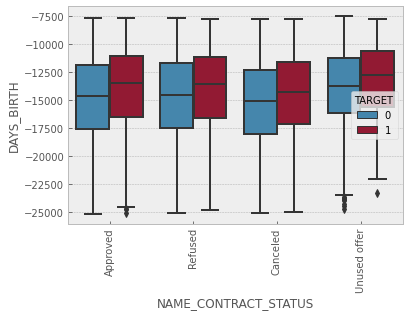

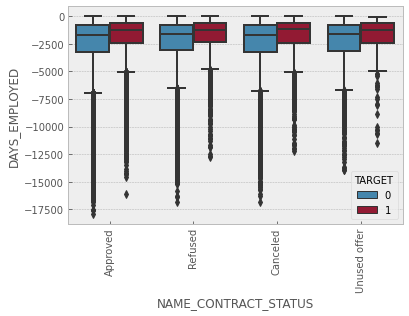

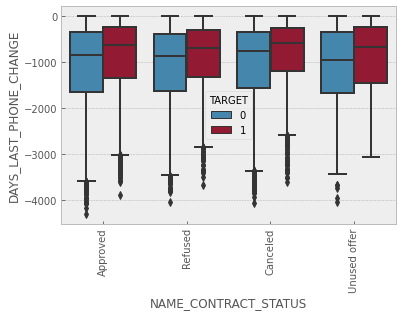

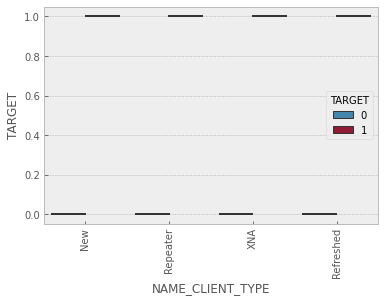

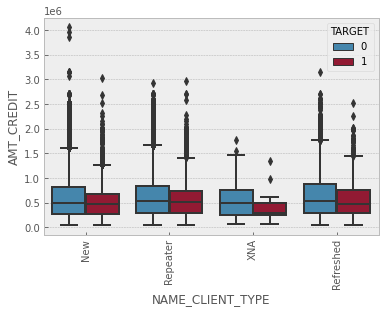

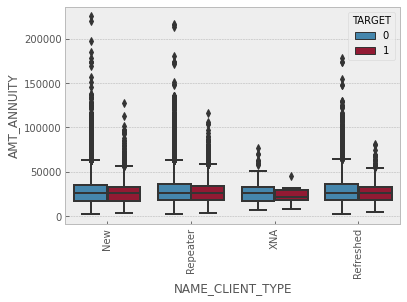

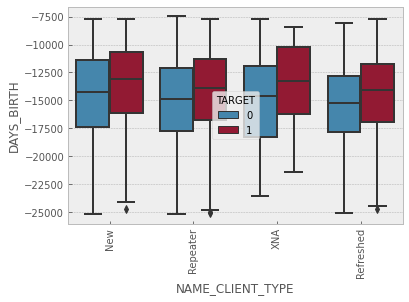

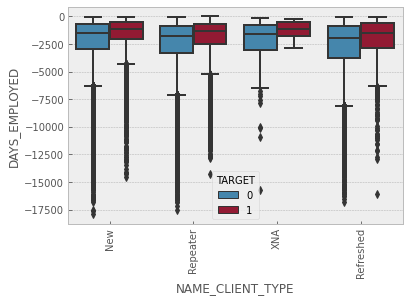

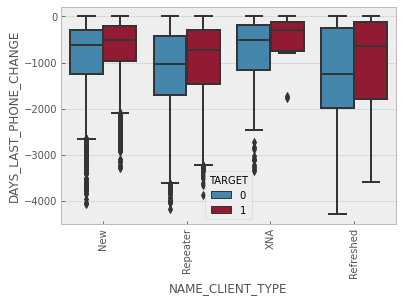

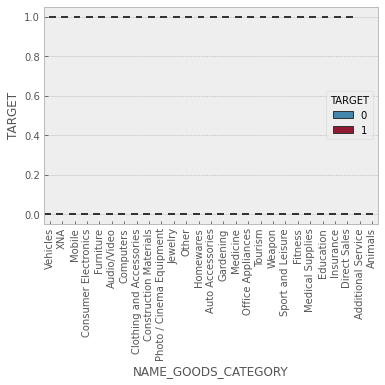

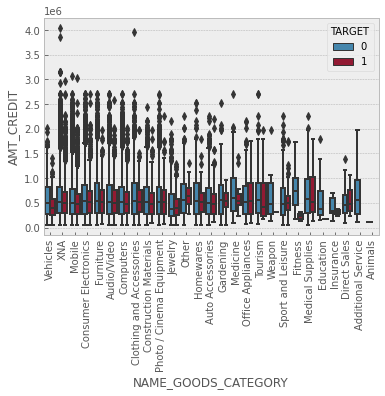

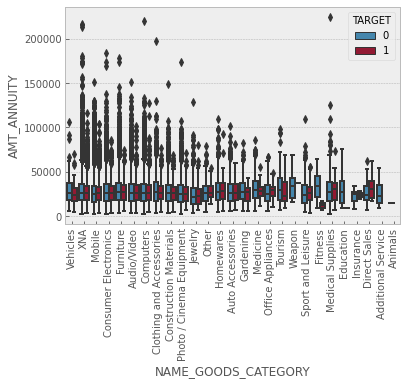

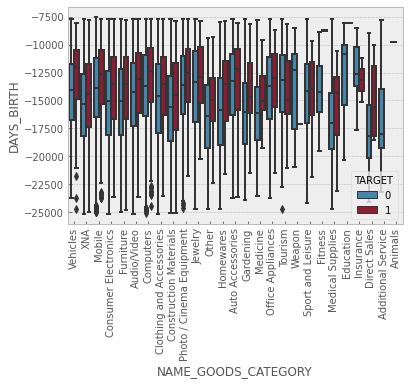

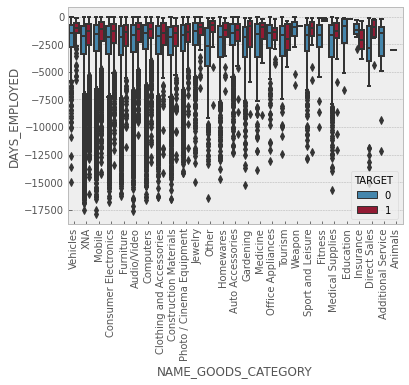

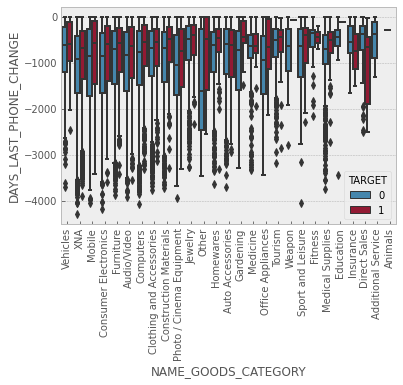

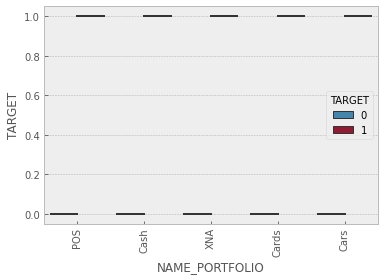

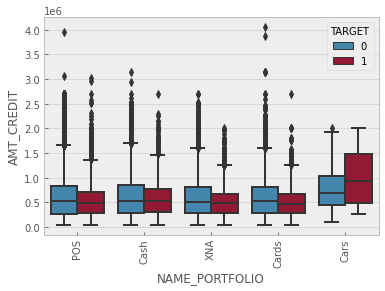

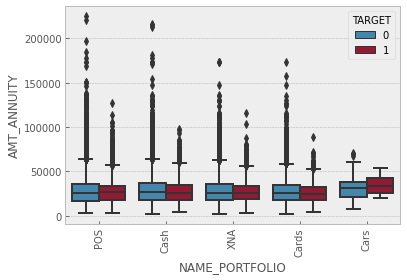

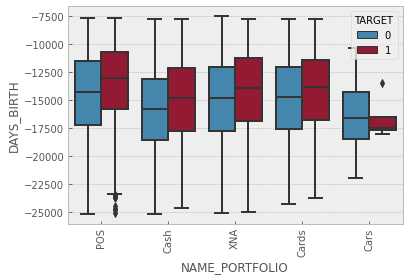

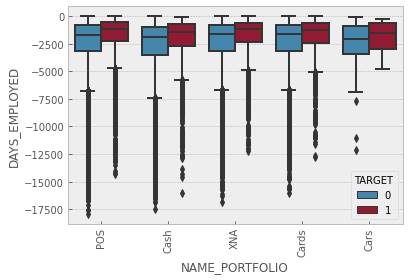

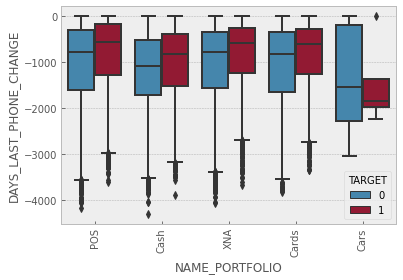

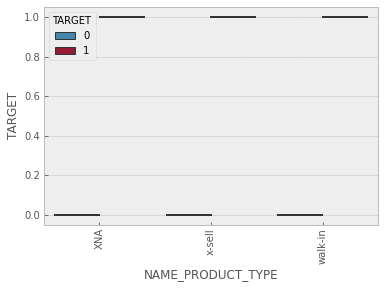

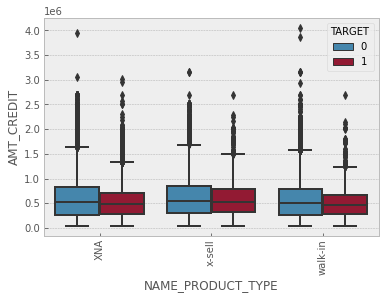

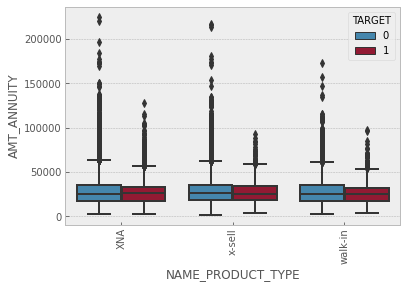

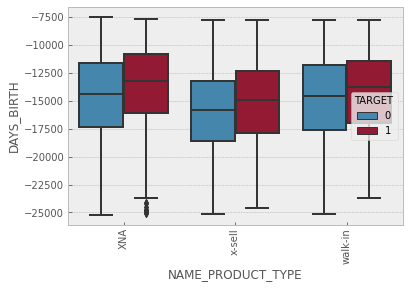

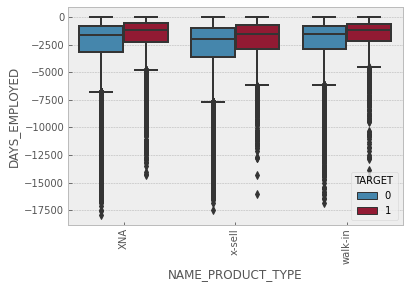

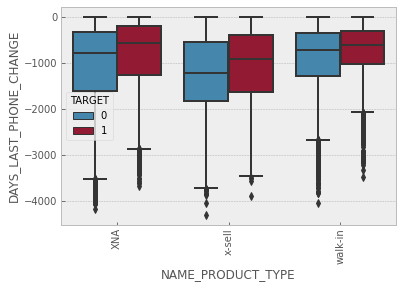

In [134]:
# Multivariate analysis of Category variables in previous data with respect to numerical data in application data with Target variable as Hue
for i in CAT1:
  for j in NUM:
    sns.boxplot(data= inp3, x=i, y=j, hue='TARGET')
    plt.xticks(rotation= 90)
    plt.show()

In [135]:
inp3.groupby('NAME_CONTRACT_STATUS')['TARGET', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY'].mean()

TARGET  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY
NAME_CONTRACT_STATUS                                                        
Approved              0.081968         2.278643                     2.035155
Canceled              0.098821         2.247842                     2.036444
Refused               0.127874         2.235020                     2.037150
Unused offer          0.090384         2.278371                     1.988161

In [136]:
# Previously rejected contracts are 12% more likely to default

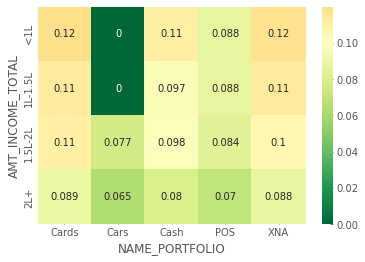

In [137]:
# Lets check correlation with heatmap from following pivot table
result2= pd.pivot_table(data= inp3, index= 'AMT_INCOME_TOTAL', columns= 'NAME_PORTFOLIO', values= 'TARGET' )
sns.heatmap(result2, annot= True, cmap= 'RdYlGn_r', center= 0.1)

In [138]:
# Applicants with portfolio cards and XNA are more likley to default

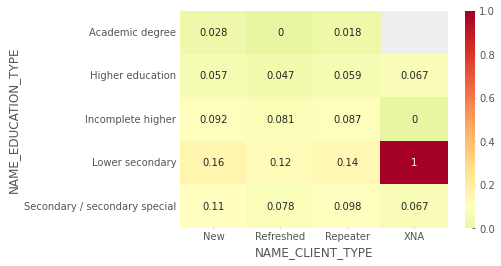

In [139]:
result2= pd.pivot_table(data= inp3, index= 'NAME_EDUCATION_TYPE', columns= 'NAME_CLIENT_TYPE', values= 'TARGET' )
sns.heatmap(result2, annot= True, cmap= 'RdYlGn_r', center= 0.1)

In [140]:
# applicants with Education type Lower secondary are most risky
# applicants with academic degree and higher education are safe to give loans

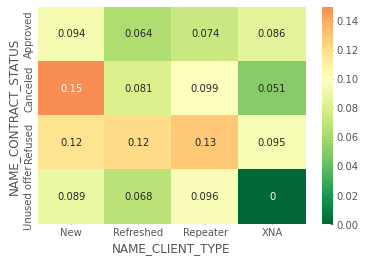

In [141]:
result2= pd.pivot_table(data= inp3, index= 'NAME_CONTRACT_STATUS', columns= 'NAME_CLIENT_TYPE', values= 'TARGET' )
sns.heatmap(result2, annot= True, cmap= 'RdYlGn_r', center= 0.1)

In [142]:
# Previously refused and cancelled more likely to do 8-15% defaults

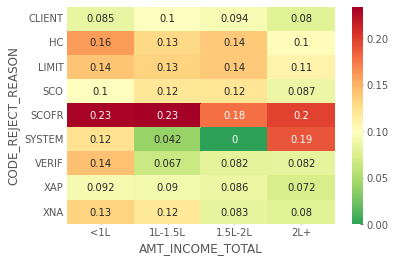

In [143]:
result2= pd.pivot_table(data= inp3, index= 'CODE_REJECT_REASON', columns= 'AMT_INCOME_TOTAL', values= 'TARGET' )
sns.heatmap(result2, annot= True, cmap= 'RdYlGn_r', center= 0.1)

In [144]:
# People with reject reason SCOFR are more likely to do 20% + defaults at all income level

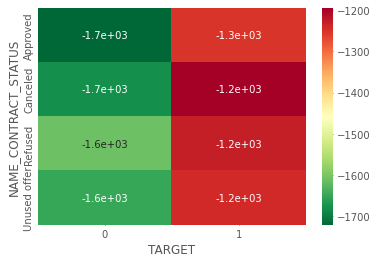

In [145]:
result3= pd.pivot_table(data= inp3, index= 'NAME_CONTRACT_STATUS',columns= 'TARGET', values= 'DAYS_EMPLOYED', aggfunc='median')
#plt.figure(figsize= [12,8])
sns.heatmap(result3, annot= True, cmap= 'RdYlGn_r')

In [146]:
# people who are employed less than 1300 days are more likely to do default 

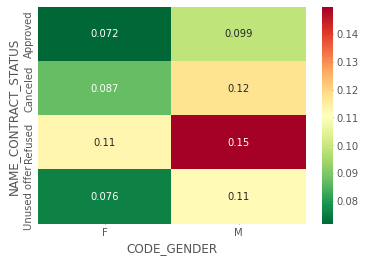

In [147]:
result= pd.pivot_table(data= inp3, index= 'NAME_CONTRACT_STATUS', columns= 'CODE_GENDER', values= 'TARGET' )
sns.heatmap(result, annot= True, cmap= 'RdYlGn_r')

In [148]:
# previously refused male 15% more likely to do default

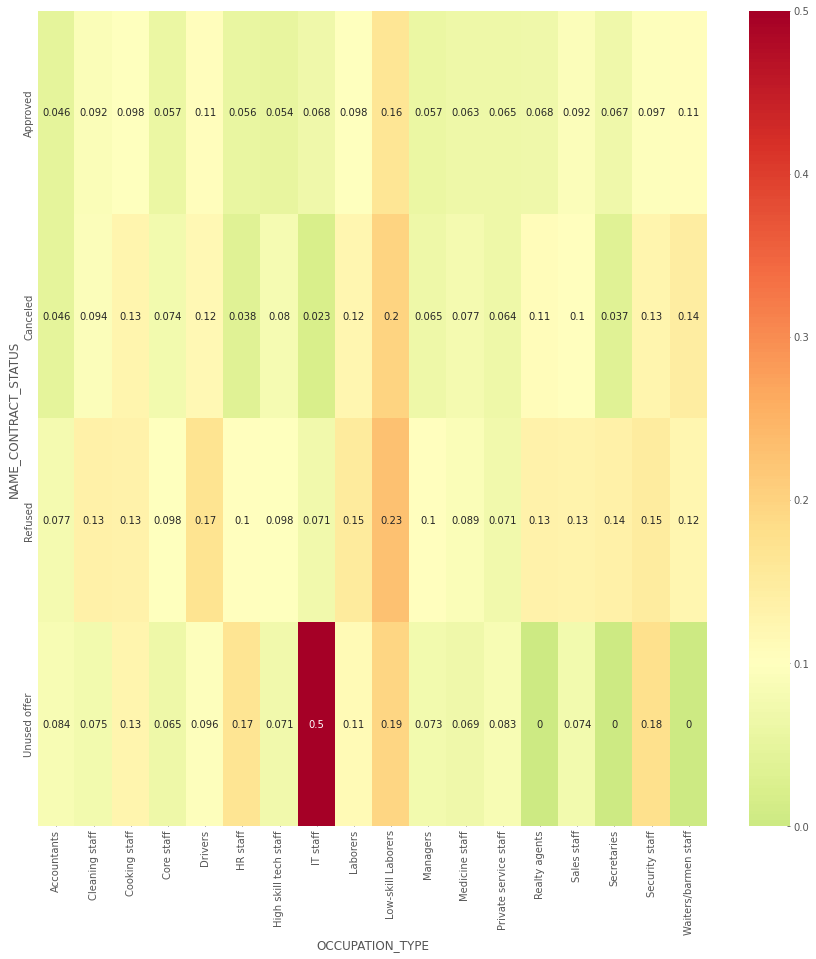

In [149]:
result1= pd.pivot_table(data= inp3, index= 'NAME_CONTRACT_STATUS', columns= 'OCCUPATION_TYPE', values= 'TARGET' )
plt.figure(figsize= [15,15])
sns.heatmap(result1, annot= True, cmap= 'RdYlGn_r', center= 0.1)

In [150]:
# IT staff with unused previous offer can 50% likely to do default followed by low skill labourers by 19%, security staff with 18% and HR staff with 17%